# ▣ 비즈니스 데이터마이닝

### 문제 3

### 목표: 국회 의원들의 Ideo_self 값 예측

### 사용한 Data set: data1.csv

### Ideo_self 에 NA 값이 있는 데이터를 Test set으로 보고 나머지 데이터를 Train set으로 보았다.  Train set을 통해 모델들을 학습시키고 학습한 모델을 토대로 Test set의 Ideo_self 값을 추정해 보았다. 

다음 모델들의 테스트 성능을 비교해 본다.
1. Logistic regression
2. k-nearest neighbor classifier
3. naive Bayes classifier
4. Decision tree
5. Random forest
6. SVM
7. Xgboost
8. SoftMax
9. Keras + Relu + SoftMax

# 0. Data preprocessing

In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [375]:
data = pd.read_excel('data1.xlsx', header = 1)

In [376]:
data.head()

,id,sex,birth,age1,age,area,edu,income,k2,k3,k4,k6,k7,k8,k10,k12,k13,k14,ideo_self
281.0,1012.0,1.0,1994.0,22.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,1.0,0.0,NaN,5.0
393.0,556.0,1.0,1957.0,59.0,5.0,8.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,7.0
604.0,642.0,1.0,1990.0,26.0,2.0,4.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0
956.0,403.0,2.0,1966.0,50.0,5.0,2.0,4.0,7.0,NaN,1.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,3.0
212.0,776.0,1.0,1978.0,38.0,3.0,1.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,6.0


### ID column 앞에 있는 값들은 단순 index 값이므로 ID column을 새로운 index를 값으로 바꿔준다. 

In [377]:
# data = data.set_index("id").sort_index()
data = data.set_index("id")

In [378]:
data.head(10)

,sex,birth,age1,age,area,edu,income,k2,k3,k4,k6,k7,k8,k10,k12,k13,k14,ideo_self
id,,,,,,,,,,,,,,,,,,
1012.0,1.0,1994.0,22.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,1.0,0.0,NaN,5.0
556.0,1.0,1957.0,59.0,5.0,8.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,7.0
642.0,1.0,1990.0,26.0,2.0,4.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0
403.0,2.0,1966.0,50.0,5.0,2.0,4.0,7.0,NaN,1.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,3.0
776.0,1.0,1978.0,38.0,3.0,1.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,6.0
767.0,1.0,1966.0,50.0,5.0,2.0,4.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN,0.0,0.0,1.0,5.0
594.0,1.0,1982.0,34.0,3.0,2.0,2.0,1.0,NaN,NaN,1.0,1.0,NaN,0.0,NaN,0.0,0.0,1.0,5.0
869.0,1.0,1965.0,51.0,5.0,6.0,4.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,5.0
719.0,1.0,1966.0,50.0,5.0,9.0,4.0,1.0,0.0,1.0,1.0,1.0,NaN,0.0,1.0,0.0,0.0,0.0,4.0


## Data 내에 모든 column 값이 NA인 값을 걸러준다. 

In [379]:
data = data.dropna(how="all")

In [380]:
data.shape

(1054, 18)

## 결과물을 원하는 모양으로 보여주기 위한 옵션을 건다. 

In [381]:
pd.set_option('display.width', 100)  # 결과물을 잘 보여주기 위한 옵션, column 숫자를 표현한 것 같다. 10 단위로
pd.set_option('precision', 3)        # 결과물을 잘 보여주기 위한 옵션, 숫자 소수점 표현하는 것 
data.head()

,sex,birth,age1,age,area,edu,income,k2,k3,k4,k6,k7,k8,k10,k12,k13,k14,ideo_self
id,,,,,,,,,,,,,,,,,,
1012.0,1.0,1994.0,22.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,1.0,0.0,NaN,5.0
556.0,1.0,1957.0,59.0,5.0,8.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,7.0
642.0,1.0,1990.0,26.0,2.0,4.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0
403.0,2.0,1966.0,50.0,5.0,2.0,4.0,7.0,NaN,1.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,3.0
776.0,1.0,1978.0,38.0,3.0,1.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,6.0


In [382]:
data.describe()

,sex,birth,age1,age,area,edu,income,k2,k3,k4,k6,k7,k8,k10,k12,k13,k14,ideo_self
count,1054.000,1054.000,1054.000,1054.000,1054.000,1054.000,1054.000,827.000,854.000,843.000,877.000,784.000,921.000,776.000,944.000,966.000,934.000,899.000
mean,1.415,1971.749,44.251,4.014,5.653,3.124,1.787,0.657,0.485,0.537,0.719,0.256,0.385,0.454,0.469,0.269,0.793,5.158
std,0.493,13.580,13.580,1.387,4.406,1.045,2.098,0.475,0.500,0.499,0.450,0.437,0.487,0.498,0.499,0.444,0.405,2.270
min,1.000,1937.000,19.000,2.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,1960.000,33.000,3.000,1.000,2.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,4.000
50%,1.000,1970.000,46.000,4.000,5.000,3.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,5.000
75%,2.000,1983.000,56.000,5.000,8.000,4.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,6.000
max,2.000,1997.000,79.000,6.000,17.000,5.000,15.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,10.000


In [383]:
data.dtypes

sex          float64
birth        float64
age1         float64
age          float64
area         float64
edu          float64
income       float64
k2           float64
k3           float64
k4           float64
k6           float64
k7           float64
k8           float64
k10          float64
k12          float64
k13          float64
k14          float64
ideo_self    float64
dtype: object

In [384]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1054 entries, 1012.0 to 345.0
Data columns (total 18 columns):
sex          1054 non-null float64
birth        1054 non-null float64
age1         1054 non-null float64
age          1054 non-null float64
area         1054 non-null float64
edu          1054 non-null float64
income       1054 non-null float64
k2           827 non-null float64
k3           854 non-null float64
k4           843 non-null float64
k6           877 non-null float64
k7           784 non-null float64
k8           921 non-null float64
k10          776 non-null float64
k12          944 non-null float64
k13          966 non-null float64
k14          934 non-null float64
ideo_self    899 non-null float64
dtypes: float64(18)
memory usage: 156.5 KB


In [385]:
data.isnull()

,sex,birth,age1,age,area,edu,income,k2,k3,k4,k6,k7,k8,k10,k12,k13,k14,ideo_self
id,,,,,,,,,,,,,,,,,,
1012.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
556.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
642.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
403.0,False,False,False,False,False,False,False,True,False,False,False,True,False,True,True,False,False,False
776.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
767.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
594.0,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False
869.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
719.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


## NA 값들을 추측하기 위한 base 데이터를 잡아준다. 

In [386]:
# k 질문들만 잡고 NA 값 추측
# x_impute = data.values[:,7:-1]

# 전체 데이터 잡고 NA값 추측 
x_impute = data.values[:,:-1]

pd.DataFrame(x_impute).isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
dtype: bool

In [387]:
x_impute.shape

(1054, 17)

## NA의 값으로 KNN, SoftImpute, SimpleFill, MICE 4개의 imputer를 쓸 예정이다.
- **Manuel for KNN:** Nearest neighbor imputations which weights samples using the mean squared difference on features for which two rows both have observed data.
- **Manuel for SimpleFill:** Replaces missing entries with the mean or median of each column.
- **Thesis for SoftImpute:** [click] http://web.stanford.edu/~hastie/Papers/mazumder10a.pdf
- **Thesis for MICE:** [click] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/


In [388]:
from fancyimpute import (
    KNN,
    SoftImpute,
    MICE
)

## MICE imputer로 missing Value를 처리했다. 

In [389]:
x_impute_filled = MICE().complete(x_impute)

[MICE] Completing matrix with shape (1054, 17)
[MICE] Starting imputation round 1/110, elapsed time 0.002
[MICE] Starting imputation round 2/110, elapsed time 0.008
[MICE] Starting imputation round 3/110, elapsed time 0.014
[MICE] Starting imputation round 4/110, elapsed time 0.021
[MICE] Starting imputation round 5/110, elapsed time 0.028
[MICE] Starting imputation round 6/110, elapsed time 0.035
[MICE] Starting imputation round 7/110, elapsed time 0.040
[MICE] Starting imputation round 8/110, elapsed time 0.045
[MICE] Starting imputation round 9/110, elapsed time 0.050
[MICE] Starting imputation round 10/110, elapsed time 0.055
[MICE] Starting imputation round 11/110, elapsed time 0.060
[MICE] Starting imputation round 12/110, elapsed time 0.066
[MICE] Starting imputation round 13/110, elapsed time 0.073
[MICE] Starting imputation round 14/110, elapsed time 0.080
[MICE] Starting imputation round 15/110, elapsed time 0.085
[MICE] Starting imputation round 16/110, elapsed time 0.090
[M

In [390]:
x_impute_filled.shape

(1054, 17)

In [391]:
pd.DataFrame(x_impute_filled).isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
dtype: bool

## Data Set에서 Missing Value를 바꿀 colums들을 분류해준다. 

In [392]:
array = data.values
# k 질문들만 잡고 NA 값 찾는 방법
# array[:, 7:-1].shape

# 전체 데이터를 잡고 NA값 찾는 방법
array[:,:-1].shape

(1054, 17)

## Impute 된 데이터를 Data Set에 적용시켜준다. 

In [393]:
array[:, :-1] = x_impute_filled

## Ideo_self column을 제외한 본 Data Set에 더 이상 Missing Value 가 없다는 것을 확인할 수 있다. 

In [394]:
pd.DataFrame(array).isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17     True
dtype: bool

In [395]:
data.head(10)

,sex,birth,age1,age,area,edu,income,k2,k3,k4,k6,k7,k8,k10,k12,k13,k14,ideo_self
id,,,,,,,,,,,,,,,,,,
1012.0,1.0,1994.0,22.0,2.0,1.0,2.0,1.0,1.000,0.000,0.0,1.0,0.000,0.0,0.421,1.000,0.0,0.765,5.0
556.0,1.0,1957.0,59.0,5.0,8.0,4.0,1.0,1.000,1.000,1.0,1.0,0.000,1.0,0.000,0.000,1.0,1.000,7.0
642.0,1.0,1990.0,26.0,2.0,4.0,2.0,1.0,0.000,1.000,1.0,1.0,0.000,0.0,0.000,0.000,0.0,1.000,10.0
403.0,2.0,1966.0,50.0,5.0,2.0,4.0,7.0,0.661,1.000,0.0,0.0,0.264,0.0,0.447,0.478,0.0,0.000,3.0
776.0,1.0,1978.0,38.0,3.0,1.0,4.0,1.0,1.000,1.000,1.0,0.0,0.000,0.0,1.000,1.000,0.0,1.000,6.0
767.0,1.0,1966.0,50.0,5.0,2.0,4.0,1.0,0.000,1.000,0.0,1.0,0.000,0.0,0.530,0.000,0.0,1.000,5.0
594.0,1.0,1982.0,34.0,3.0,2.0,2.0,1.0,0.618,0.509,1.0,1.0,0.229,0.0,0.479,0.000,0.0,1.000,5.0
869.0,1.0,1965.0,51.0,5.0,6.0,4.0,2.0,1.000,0.000,1.0,1.0,1.000,0.0,1.000,1.000,1.0,1.000,5.0
719.0,1.0,1966.0,50.0,5.0,9.0,4.0,1.0,0.000,1.000,1.0,1.0,0.216,0.0,1.000,0.000,0.0,0.000,4.0


## Impute 된 값이 확률로 나왔기 때문에 0.5 이상의 값은 1로 대체하고 0.5 이하의 값은 0으로 대체해준다. 

In [396]:
for i in range(0, 1054):
    for j in range(0, 10):
        if np.any(array[:, 7:-1][i][j] >= 0.5):
            array[:, 7:-1][i][j] = 1
        else:
            array[:, 7:-1][i][j] = 0

In [397]:
data.isnull().any()

sex          False
birth        False
age1         False
age          False
area         False
edu          False
income       False
k2           False
k3           False
k4           False
k6           False
k7           False
k8           False
k10          False
k12          False
k13          False
k14          False
ideo_self     True
dtype: bool

## 확률로 된 Impute 값이 아닌 0 과 1 로 구성된 값을 볼 수 있다. 

In [398]:
data.head()

,sex,birth,age1,age,area,edu,income,k2,k3,k4,k6,k7,k8,k10,k12,k13,k14,ideo_self
id,,,,,,,,,,,,,,,,,,
1012.0,1.0,1994.0,22.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0
556.0,1.0,1957.0,59.0,5.0,8.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,7.0
642.0,1.0,1990.0,26.0,2.0,4.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0
403.0,2.0,1966.0,50.0,5.0,2.0,4.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
776.0,1.0,1978.0,38.0,3.0,1.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,6.0


## Ideo_self 가 class 별로 몇 개씩 있는지 확인해본다. 

In [399]:
ideo_self_counts = data.groupby('ideo_self').size()
ideo_self_counts

ideo_self
0.0      31
1.0      22
2.0      41
3.0     101
4.0      98
5.0     282
6.0     101
7.0      87
8.0      63
9.0      21
10.0     52
dtype: int64

In [400]:
data.head()

,sex,birth,age1,age,area,edu,income,k2,k3,k4,k6,k7,k8,k10,k12,k13,k14,ideo_self
id,,,,,,,,,,,,,,,,,,
1012.0,1.0,1994.0,22.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0
556.0,1.0,1957.0,59.0,5.0,8.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,7.0
642.0,1.0,1990.0,26.0,2.0,4.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0
403.0,2.0,1966.0,50.0,5.0,2.0,4.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
776.0,1.0,1978.0,38.0,3.0,1.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,6.0


## Encoding categorical variables
- Categorical variable: 값이 nominal인 변수
- 한 variable에 category가 총 C개가 존재하는 경우, 이를 C개의 binary dummy variables로 변환하여 수치형 데이터로 변환할 수 있다.
- 모든 variable의 숫자 값이 category 값이기 때문에 **One hot encoding**을 통해 binary dummy variables로 변환해준다. 
- Using `pandas.get_dummies`
    - [click]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html


In [401]:
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder()

In [402]:
Sex_dummies = pd.get_dummies(data.sex, prefix = 'sex')
Sex_dummies.sample(n = 10)

,sex_1.0,sex_2.0
id,,
471.0,0,1
119.0,0,1
103.0,0,1
301.0,0,1
475.0,1,0
970.0,1,0
100.0,0,1
568.0,1,0
560.0,1,0


In [403]:
Age_dummies = pd.get_dummies(data.age, prefix = 'age')
Age_dummies.sample(n = 10)

,age_2.0,age_3.0,age_4.0,age_5.0,age_6.0
id,,,,,
954.0,0,0,1,0,0
175.0,0,0,0,1,0
410.0,1,0,0,0,0
914.0,0,0,1,0,0
727.0,0,0,0,0,1
886.0,1,0,0,0,0
904.0,0,0,1,0,0
566.0,0,0,1,0,0
777.0,0,0,0,1,0


In [404]:
Area_dummies = pd.get_dummies(data.area, prefix = 'area')
Area_dummies.sample(n = 10)

,area_1.0,area_2.0,area_3.0,area_4.0,area_5.0,area_6.0,area_7.0,area_8.0,area_9.0,area_10.0,area_11.0,area_12.0,area_13.0,area_14.0,area_15.0,area_16.0,area_17.0
id,,,,,,,,,,,,,,,,,
307.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
735.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
480.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
108.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
27.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
383.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
158.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
174.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
270.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [405]:
Edu_dummies = pd.get_dummies(data.edu, prefix = 'education')
Edu_dummies.sample(n = 10)

,education_1.0,education_2.0,education_3.0,education_4.0,education_5.0
id,,,,,
147.0,0,0,0,1,0
891.0,1,0,0,0,0
944.0,0,1,0,0,0
27.0,0,0,0,1,0
424.0,0,0,0,1,0
11.0,0,0,0,1,0
462.0,0,0,0,1,0
812.0,0,0,1,0,0
517.0,0,0,0,1,0


In [406]:
Income_dummies = pd.get_dummies(data.income, prefix = 'income')
Income_dummies.sample(n = 10)

,income_1.0,income_2.0,income_3.0,income_4.0,income_5.0,income_6.0,income_7.0,income_8.0,income_9.0,income_10.0,income_11.0,income_12.0,income_14.0,income_15.0
id,,,,,,,,,,,,,,
261.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
954.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
451.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
97.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
541.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
573.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
154.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
65.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
821.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [407]:
k2_dummies = pd.get_dummies(data.k2, prefix = 'k2')
k2_dummies.sample(n = 10)

,k2_0.0,k2_1.0
id,,
606.0,0,1
681.0,0,1
736.0,0,1
482.0,1,0
995.0,0,1
281.0,0,1
1046.0,0,1
919.0,0,1
1031.0,0,1


In [408]:
k3_dummies = pd.get_dummies(data.k3, prefix = 'k3')
k3_dummies.sample(n = 10)

,k3_0.0,k3_1.0
id,,
500.0,0,1
182.0,0,1
867.0,1,0
170.0,0,1
666.0,0,1
155.0,1,0
865.0,1,0
807.0,1,0
88.0,0,1


In [409]:
k4_dummies = pd.get_dummies(data.k4, prefix = 'k4')
k4_dummies.sample(n = 10)

,k4_0.0,k4_1.0
id,,
224.0,0,1
647.0,0,1
493.0,0,1
1043.0,0,1
832.0,1,0
653.0,0,1
765.0,0,1
103.0,0,1
782.0,0,1


In [410]:
k6_dummies = pd.get_dummies(data.k6, prefix = 'k6')
k6_dummies.sample(n = 10)

,k6_0.0,k6_1.0
id,,
24.0,0,1
472.0,0,1
944.0,0,1
430.0,1,0
561.0,0,1
501.0,0,1
271.0,0,1
866.0,0,1
822.0,1,0


In [411]:
k7_dummies = pd.get_dummies(data.k7, prefix = 'k7')
k7_dummies.sample(n = 10)

,k7_0.0,k7_1.0
id,,
808.0,1,0
310.0,1,0
926.0,1,0
283.0,1,0
717.0,1,0
912.0,1,0
757.0,0,1
400.0,1,0
833.0,0,1


In [412]:
k8_dummies = pd.get_dummies(data.k8, prefix = 'k8')
k8_dummies.sample(n = 10)

,k8_0.0,k8_1.0
id,,
627.0,1,0
670.0,0,1
423.0,1,0
594.0,1,0
145.0,1,0
451.0,1,0
521.0,0,1
915.0,0,1
983.0,0,1


In [413]:
k10_dummies = pd.get_dummies(data.k10, prefix = 'k10')
k10_dummies.sample(n = 10)

,k10_0.0,k10_1.0
id,,
463.0,1,0
360.0,0,1
382.0,1,0
75.0,0,1
606.0,1,0
204.0,1,0
482.0,0,1
336.0,1,0
370.0,1,0


In [414]:
k12_dummies = pd.get_dummies(data.k12, prefix = 'k12')
k12_dummies.sample(n = 10)

,k12_0.0,k12_1.0
id,,
463.0,0,1
337.0,1,0
74.0,1,0
552.0,1,0
809.0,1,0
170.0,0,1
823.0,1,0
208.0,1,0
331.0,0,1


In [415]:
k13_dummies = pd.get_dummies(data.k13, prefix = 'k13')
k13_dummies.sample(n = 10)

,k13_0.0,k13_1.0
id,,
484.0,1,0
681.0,0,1
187.0,0,1
109.0,1,0
1027.0,1,0
68.0,1,0
244.0,1,0
579.0,1,0
905.0,1,0


In [416]:
k14_dummies = pd.get_dummies(data.k14, prefix = 'k14')
k14_dummies.sample(n = 10)

,k14_0.0,k14_1.0
id,,
713.0,0,1
657.0,0,1
709.0,0,1
234.0,1,0
571.0,0,1
957.0,0,1
187.0,0,1
710.0,0,1
915.0,0,1


## Dummy Variable로 변경된 variables를 Data set에 추가해주고 그 파일 이름을 new_data라고 칭한다. 

In [417]:
new_data = pd.concat([data,  Sex_dummies, Age_dummies, Area_dummies, Edu_dummies, Income_dummies, k2_dummies, k3_dummies, k4_dummies, k6_dummies, k7_dummies, k8_dummies, k10_dummies, k12_dummies, k13_dummies, k14_dummies], axis = 1)
new_data.head(10)

,sex,birth,age1,age,area,edu,income,k2,k3,k4,...,k8_0.0,k8_1.0,k10_0.0,k10_1.0,k12_0.0,k12_1.0,k13_0.0,k13_1.0,k14_0.0,k14_1.0
id,,,,,,,,,,,,,,,,,,,,,
1012.0,1.0,1994.0,22.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,...,1,0,1,0,0,1,1,0,0,1
556.0,1.0,1957.0,59.0,5.0,8.0,4.0,1.0,1.0,1.0,1.0,...,0,1,1,0,1,0,0,1,0,1
642.0,1.0,1990.0,26.0,2.0,4.0,2.0,1.0,0.0,1.0,1.0,...,1,0,1,0,1,0,1,0,0,1
403.0,2.0,1966.0,50.0,5.0,2.0,4.0,7.0,1.0,1.0,0.0,...,1,0,1,0,1,0,1,0,1,0
776.0,1.0,1978.0,38.0,3.0,1.0,4.0,1.0,1.0,1.0,1.0,...,1,0,0,1,0,1,1,0,0,1
767.0,1.0,1966.0,50.0,5.0,2.0,4.0,1.0,0.0,1.0,0.0,...,1,0,0,1,1,0,1,0,0,1
594.0,1.0,1982.0,34.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,...,1,0,1,0,1,0,1,0,0,1
869.0,1.0,1965.0,51.0,5.0,6.0,4.0,2.0,1.0,0.0,1.0,...,1,0,0,1,0,1,0,1,0,1
719.0,1.0,1966.0,50.0,5.0,9.0,4.0,1.0,0.0,1.0,1.0,...,1,0,0,1,1,0,1,0,1,0


## Dummy variable로 이미 변경된 variables들은 더 이상 필요하지 않기 때문에 new_data set에서 제거해준다. 

In [418]:
new_data = new_data.drop(['age', 'birth', 'area', 'sex', 'age1','edu', 'income','k2','k3','k4','k6','k7','k8','k10','k12','k13','k14'], axis = 1)
new_data.head(10)

,ideo_self,sex_1.0,sex_2.0,age_2.0,age_3.0,age_4.0,age_5.0,age_6.0,area_1.0,area_2.0,...,k8_0.0,k8_1.0,k10_0.0,k10_1.0,k12_0.0,k12_1.0,k13_0.0,k13_1.0,k14_0.0,k14_1.0
id,,,,,,,,,,,,,,,,,,,,,
1012.0,5.0,1,0,1,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,0,1
556.0,7.0,1,0,0,0,0,1,0,0,0,...,0,1,1,0,1,0,0,1,0,1
642.0,10.0,1,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
403.0,3.0,0,1,0,0,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
776.0,6.0,1,0,0,1,0,0,0,1,0,...,1,0,0,1,0,1,1,0,0,1
767.0,5.0,1,0,0,0,0,1,0,0,1,...,1,0,0,1,1,0,1,0,0,1
594.0,5.0,1,0,0,1,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
869.0,5.0,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,1
719.0,4.0,1,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,1,0


## New_data에서 Ideo_self의 값이 NA인 row가 ID Number 24 부터이기 때문에 NA 값인 rows들을 따로 분류해준다. 

In [419]:
new_data[24:]

,ideo_self,sex_1.0,sex_2.0,age_2.0,age_3.0,age_4.0,age_5.0,age_6.0,area_1.0,area_2.0,...,k8_0.0,k8_1.0,k10_0.0,k10_1.0,k12_0.0,k12_1.0,k13_0.0,k13_1.0,k14_0.0,k14_1.0
id,,,,,,,,,,,,,,,,,,,,,
24.0,NaN,1,0,0,0,0,0,1,1,0,...,0,1,1,0,1,0,0,1,0,1
107.0,NaN,1,0,0,0,0,0,1,1,0,...,0,1,0,1,0,1,0,1,0,1
111.0,NaN,1,0,0,0,0,0,1,1,0,...,1,0,1,0,1,0,1,0,0,1
118.0,NaN,1,0,0,0,0,0,1,1,0,...,0,1,1,0,1,0,0,1,1,0
182.0,NaN,1,0,0,0,0,0,1,1,0,...,0,1,1,0,1,0,1,0,0,1
281.0,NaN,1,0,0,0,0,0,1,1,0,...,0,1,1,0,1,0,0,1,1,0
289.0,NaN,1,0,0,0,0,0,1,1,0,...,0,1,1,0,1,0,0,1,0,1
339.0,NaN,1,0,0,0,0,0,1,1,0,...,1,0,0,1,1,0,1,0,0,1
357.0,NaN,1,0,0,0,0,0,1,1,0,...,1,0,0,1,0,1,1,0,0,1


## New_data의 ID Number 24 부터는 모두 NA 값이 포함되어 있는 것을 볼 수 있다. 

In [420]:
new_data[24:].ideo_self.isnull()

id
24.0      True
107.0     True
111.0     True
118.0     True
182.0     True
281.0     True
289.0     True
339.0     True
357.0     True
415.0     True
447.0     True
629.0     True
727.0     True
755.0     True
120.0     True
129.0     True
168.0     True
202.0     True
499.0     True
613.0     True
801.0     True
809.0     True
986.0     True
87.0      True
103.0     True
119.0     True
141.0     True
768.0     True
805.0     True
857.0     True
          ... 
982.0     True
236.0     True
909.0     True
166.0     True
381.0     True
1016.0    True
845.0     True
924.0     True
72.0      True
620.0     True
204.0     True
228.0     True
21.0      True
951.0     True
612.0     True
621.0     True
636.0     True
326.0     True
705.0     True
219.0     True
222.0     True
714.0     True
751.0     True
654.0     True
170.0     True
927.0     True
646.0     True
331.0     True
562.0     True
345.0     True
Name: ideo_self, Length: 155, dtype: bool

## Ideo_self의 NA 값을 기준으로 Train data와 Test data를 나눠준다. 

In [421]:
train_data = new_data[:199]
test_data = new_data[24:]

In [422]:
train_data.head()

,ideo_self,sex_1.0,sex_2.0,age_2.0,age_3.0,age_4.0,age_5.0,age_6.0,area_1.0,area_2.0,...,k8_0.0,k8_1.0,k10_0.0,k10_1.0,k12_0.0,k12_1.0,k13_0.0,k13_1.0,k14_0.0,k14_1.0
id,,,,,,,,,,,,,,,,,,,,,
1012.0,5.0,1,0,1,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,0,1
556.0,7.0,1,0,0,0,0,1,0,0,0,...,0,1,1,0,1,0,0,1,0,1
642.0,10.0,1,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
403.0,3.0,0,1,0,0,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
776.0,6.0,1,0,0,1,0,0,0,1,0,...,1,0,0,1,0,1,1,0,0,1


In [423]:
test_data.head()

,ideo_self,sex_1.0,sex_2.0,age_2.0,age_3.0,age_4.0,age_5.0,age_6.0,area_1.0,area_2.0,...,k8_0.0,k8_1.0,k10_0.0,k10_1.0,k12_0.0,k12_1.0,k13_0.0,k13_1.0,k14_0.0,k14_1.0
id,,,,,,,,,,,,,,,,,,,,,
24.0,NaN,1,0,0,0,0,0,1,1,0,...,0,1,1,0,1,0,0,1,0,1
107.0,NaN,1,0,0,0,0,0,1,1,0,...,0,1,0,1,0,1,0,1,0,1
111.0,NaN,1,0,0,0,0,0,1,1,0,...,1,0,1,0,1,0,1,0,0,1
118.0,NaN,1,0,0,0,0,0,1,1,0,...,0,1,1,0,1,0,0,1,1,0
182.0,NaN,1,0,0,0,0,0,1,1,0,...,0,1,1,0,1,0,1,0,0,1


## Train Data를 X와 Y를 나눠주기 위해 Train data의 columns 이름과 갯수를 확인한다. 

In [424]:
# 변수명 가져오기
col_names = train_data.columns.values

In [425]:
# Ideo_self column은 첫 번째 column이다. 
col_names[:1]

array(['ideo_self'], dtype=object)

In [426]:
# Ideo_self를 기준으로 X와 Y를 나눠준다. 
train_X = train_data[col_names[1:]]
train_Y = train_data[col_names[:1]]

In [427]:
train_X.head(5)

,sex_1.0,sex_2.0,age_2.0,age_3.0,age_4.0,age_5.0,age_6.0,area_1.0,area_2.0,area_3.0,...,k8_0.0,k8_1.0,k10_0.0,k10_1.0,k12_0.0,k12_1.0,k13_0.0,k13_1.0,k14_0.0,k14_1.0
id,,,,,,,,,,,,,,,,,,,,,
1012.0,1,0,1,0,0,0,0,1,0,0,...,1,0,1,0,0,1,1,0,0,1
556.0,1,0,0,0,0,1,0,0,0,0,...,0,1,1,0,1,0,0,1,0,1
642.0,1,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
403.0,0,1,0,0,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
776.0,1,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,1,1,0,0,1


In [428]:
train_Y.head()

,ideo_self
id,
1012.0,5.0
556.0,7.0
642.0,10.0
403.0,3.0
776.0,6.0


## Test Data를 X와 Y를 나눠주기 위해 Test data의 columns 이름과 갯수를 확인한다. 

In [429]:
# 변수명 가져오기
col_names = test_data.columns.values

In [430]:
# Ideo_self column은 첫 번째 column이다. 
col_names[:1]

array(['ideo_self'], dtype=object)

In [431]:
# Ideo_self를 기준으로 X와 Y를 나눠준다. 
test_X = test_data[col_names[1:]]
test_Y = test_data[col_names[:1]]

In [432]:
test_X.head(5)

,sex_1.0,sex_2.0,age_2.0,age_3.0,age_4.0,age_5.0,age_6.0,area_1.0,area_2.0,area_3.0,...,k8_0.0,k8_1.0,k10_0.0,k10_1.0,k12_0.0,k12_1.0,k13_0.0,k13_1.0,k14_0.0,k14_1.0
id,,,,,,,,,,,,,,,,,,,,,
24.0,1,0,0,0,0,0,1,1,0,0,...,0,1,1,0,1,0,0,1,0,1
107.0,1,0,0,0,0,0,1,1,0,0,...,0,1,0,1,0,1,0,1,0,1
111.0,1,0,0,0,0,0,1,1,0,0,...,1,0,1,0,1,0,1,0,0,1
118.0,1,0,0,0,0,0,1,1,0,0,...,0,1,1,0,1,0,0,1,1,0
182.0,1,0,0,0,0,0,1,1,0,0,...,0,1,1,0,1,0,1,0,0,1


In [433]:
test_Y.head(5)

,ideo_self
id,
24.0,NaN
107.0,NaN
111.0,NaN
118.0,NaN
182.0,NaN


# 1. Split Train data
1. Training set (70%)
2. Validation set (30%)


## Model에 학습시키기 위해 Train set의 X와 Y 값을 array 값으로 바꿔준다.

In [434]:
train_X = train_X.values
train_Y = train_Y.values

In [435]:
# Y 값을 numpy.ravel 함수를 써서 reshape 시켜준다. Return a contiguous flattened array.

train_Y = np.ravel(train_Y)

In [436]:
train_X

array([[1, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [1, 0, 1, ..., 0, 0, 1],
       ..., 
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 0, 1, ..., 0, 0, 1]], dtype=uint8)

In [437]:
train_Y

array([  5.,   7.,  10.,   3.,   6.,   5.,   5.,   5.,   4.,   8.,   3.,
         3.,   5.,   1.,   7.,   4.,   3.,   4.,   9.,   4.,   5.,   3.,
         7.,   6.,   3.,   3.,   9.,   5.,   3.,   4.,   4.,   5.,   5.,
         5.,  10.,   5.,   0.,   2.,   5.,   5.,   6.,   0.,   2.,   3.,
         2.,   2.,   5.,   4.,   6.,   2.,   5.,   6.,   4.,   5.,   6.,
         1.,   8.,   0.,   4.,   3.,   3.,   4.,   5.,   8.,   7.,   5.,
         5.,   5.,   5.,   3.,   6.,   6.,   8.,   3.,   5.,   0.,   7.,
         5.,   6.,   2.,   8.,   4.,   3.,   7.,   3.,   5.,   4.,   0.,
         5.,   5.,   6.,   8.,   5.,   2.,   5.,   5.,   6.,   3.,   4.,
         7.,   6.,   5.,   5.,   6.,   4.,   5.,   6.,   5.,   5.,   1.,
         7.,   5.,   4.,   3.,   7.,   6.,  10.,   5.,   5.,   5.,   6.,
         6.,   0.,   4.,   3.,  10.,   3.,   1.,   7.,   4.,   6.,   5.,
         6.,   4.,   5.,   5.,   5.,   5.,   5.,   1.,   2.,   3.,   4.,
         6.,   5.,   4.,  10.,   8.,   7.,   6.,   

## Model에 학습시키기 위해 Test set의 X와 Y 값을 array 값으로 바꿔준다.

In [438]:
test_X = test_X.values
test_Y = test_Y.values

In [439]:
# Y 값을 numpy.ravel 함수를 써서 reshape 시켜준다. Return a contiguous flattened array.

test_Y = np.ravel(test_Y)

In [440]:
test_X

array([[1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ..., 
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [441]:
test_Y

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  n

## Skitlearn library를 통해 Train set을 Train 과 Validataion 으로 나눠준다. 

In [442]:
from sklearn.model_selection import train_test_split

In [443]:
train_X_train, train_X_val, train_Y_train, train_Y_val = train_test_split(train_X, train_Y, 
                                                        test_size=0.3, 
                                                        random_state=123)

In [444]:
# Train, Validation Set의 shape을 확인해준다.

print(train_X_train.shape)
print(train_X_val.shape)
print(train_Y_train.shape)
print(train_Y_val.shape)

(629, 63)
(270, 63)
(629,)
(270,)


# 2. Fit the model and compare validation AUCs and prediction probability
비교하고자 하는 classifiers들은 다음과 같음
1. Logistic regression
2. k-nearest neighbor classifier
3. naive Bayes classifier
4. Decision tree
5. Random forest
6. SVM
7. Xgboost
8. SoftMax

In [79]:
from pprint import pprint
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

## 2.1. Logistic regression
Manual for `sklearn.linear_model.LogisticRegression`: [click](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

다음 parameter들에 대해 validation data에 대한 Score값과 AUC값을 이용해 최적 모형 parameter를 찾는다. 
1. penalty
2. C

In [80]:
# C가 클수록 weak regularization
penalty_set = ['l1', 'l2']
C_set = [0.1, 1, 10, 1e2, 1e3, 1e4, 1e5, 1e6]

In [81]:
result1 = []
for penalty in penalty_set:
    for C in C_set:
        logreg_model = LogisticRegression(penalty=penalty, C=C, class_weight='balanced', multi_class="multinomial", solver='saga', max_iter=10000)
        logreg_model = logreg_model.fit(train_X_train, train_Y_train)
#         Y_val_score = model.decision_function(train_X_val)
        Y_val_score = logreg_model.predict_proba(train_X_val)[:, 1]
        val_proba = "{:.4f}".format(logreg_model.score(train_X_val, train_Y_val))
        fpr, tpr, _ = roc_curve(train_Y_val, Y_val_score, pos_label=True)
        result1.append((logreg_model, penalty, C, val_proba, auc(fpr, tpr)))

c:\users\daniel\python36\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [82]:
result1

[(LogisticRegression(C=0.1, class_weight='balanced', dual=False,
            fit_intercept=True, intercept_scaling=1, max_iter=10000,
            multi_class='multinomial', n_jobs=1, penalty='l1',
            random_state=None, solver='saga', tol=0.0001, verbose=0,
            warm_start=False), 'l1', 0.1, '0.0926', 0.70113207547169809),
 (LogisticRegression(C=1, class_weight='balanced', dual=False,
            fit_intercept=True, intercept_scaling=1, max_iter=10000,
            multi_class='multinomial', n_jobs=1, penalty='l1',
            random_state=None, solver='saga', tol=0.0001, verbose=0,
            warm_start=False), 'l1', 1, '0.1704', 0.62792452830188683),
 (LogisticRegression(C=10, class_weight='balanced', dual=False,
            fit_intercept=True, intercept_scaling=1, max_iter=10000,
            multi_class='multinomial', n_jobs=1, penalty='l1',
            random_state=None, solver='saga', tol=0.0001, verbose=0,
            warm_start=False), 'l1', 10, '0.1630', 0.648301

In [83]:
logreg_result = sorted(result1, key=lambda x: x[3], reverse=True)

In [84]:
logreg_result

[(LogisticRegression(C=10000.0, class_weight='balanced', dual=False,
            fit_intercept=True, intercept_scaling=1, max_iter=10000,
            multi_class='multinomial', n_jobs=1, penalty='l2',
            random_state=None, solver='saga', tol=0.0001, verbose=0,
            warm_start=False), 'l2', 10000.0, '0.1889', 0.51018867924528299),
 (LogisticRegression(C=0.1, class_weight='balanced', dual=False,
            fit_intercept=True, intercept_scaling=1, max_iter=10000,
            multi_class='multinomial', n_jobs=1, penalty='l2',
            random_state=None, solver='saga', tol=0.0001, verbose=0,
            warm_start=False), 'l2', 0.1, '0.1741', 0.71169811320754717),
 (LogisticRegression(C=1, class_weight='balanced', dual=False,
            fit_intercept=True, intercept_scaling=1, max_iter=10000,
            multi_class='multinomial', n_jobs=1, penalty='l1',
            random_state=None, solver='saga', tol=0.0001, verbose=0,
            warm_start=False), 'l1', 1, '0.1704'

## Best Result에 대해 보여준다. 

In [85]:
best_logreg_result = logreg_result[0]
print(best_logreg_result)

(LogisticRegression(C=10000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='saga', tol=0.0001, verbose=0,
          warm_start=False), 'l2', 10000.0, '0.1889', 0.51018867924528299)


## Best Model의 MAE 값을 보여준다. 

In [86]:
best_logreg_model = best_logreg_result[0]
best_logreg_model = best_logreg_model.fit(train_X_train, train_Y_train)
print(metrics.mean_absolute_error(best_logreg_model.predict(train_X_val), train_Y_val))

2.60740740741


c:\users\daniel\python36\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [87]:
# predict_proba 결과 중 앞부분 6개에 대해서만 확인한다.
print("예측 확률:\n{}".format(best_logreg_model.predict_proba(train_X_val)[:6]))

# 행 방향으로 확률을 더하면 모두 1이 된다.
print("합: {}".format(best_logreg_model.predict_proba(train_X_val)[:6].sum(axis=1)))

예측 확률:
[[  5.60834164e-04   1.55556775e-08   6.58633385e-09   3.23814553e-04
    5.79178781e-01   3.20140647e-01   9.96933820e-02   3.37284159e-05
    5.76094152e-05   4.79657571e-16   1.11815127e-05]
 [  1.84085578e-01   4.88950725e-02   2.68903498e-02   1.63449381e-01
    1.20663205e-01   1.70211796e-01   7.29739931e-02   1.10316393e-01
    8.20697705e-02   7.56245155e-09   2.04444534e-02]
 [  3.39018770e-02   9.52643399e-08   1.38967107e-02   5.22160024e-01
    6.00760717e-02   1.40356018e-02   2.74834495e-02   1.34108169e-01
    1.83073561e-02   6.78903050e-14   1.76030645e-01]
 [  9.13434298e-05   7.85303602e-06   8.77125666e-06   8.50996102e-05
    3.69908209e-01   5.63249447e-02   3.60182850e-01   2.13325140e-01
    6.21700301e-05   1.28692605e-12   3.61884931e-06]
 [  4.62929946e-02   1.99816391e-06   2.37491031e-03   7.91961128e-02
    1.35791031e-02   3.49176640e-02   1.80278575e-02   2.89808081e-01
    8.65812317e-02   2.30851196e-12   4.29220047e-01]
 [  4.52292278e-03   2.

## predict_proba의 결과에 argmax 함수를 적용해서 예측을 재연할 수 있다. 

In [88]:
print("가장 큰 예측 확률의 인덱스:\n{}".format(np.argmax(best_logreg_model.predict_proba(train_X_val), axis=1)))
print("예측:\n{}".format(best_logreg_model.predict(train_X_val)))

가장 큰 예측 확률의 인덱스:
[ 4  0  3  4 10  9  6  4 10  5  2  2  7  8  0  1  1  4  8  9  8  0  0  6 10
  8  0  0  3  0  1  5  6  5  1  4  7  0  8  5  0  5  4  5  4 10  3  5  3  1
  3  4 10  5  8  9  2  7  8  4  5  0  6  5 10  7  0  6  0  8  8  0  3  1  1
  5  7 10  1  7  0  5  7  5  0 10  9  3 10  5 10  2  1  8  2  1  6  8  7  3
  0  6  5  5  3  7  2  4  7  6  0  7  2  1 10  3  6  7  4  8  9  8  5  5  0
  0  1  3  1  0  5  9  0  8  3  0 10  0  1  8  8  2  6  1  5  3  4  7  0  0
  6  9  3  3  4  1  2  0  1  8  6  8  1  1  0  3  0  7  5  2  2  0 10  6 10
  9 10 10  2  0  7  0  9 10 10  7  1  7  7  5  2  9  0  4  0  3 10 10  2  6
  7  1  1 10  2  9  1  9  5  8  3  8 10  3  3  0  7  6  2  0  0  5  2  0  3
  3  3  8  1  4  6  7  1  6  2  8  6  7  8  0  0  9  6  8  3 10  6  1  8  8
  4  1 10  0  5  1  9  8  2  0  2  5  4  3  8  9  0  4  5  7]
예측:
[  4.   0.   3.   4.  10.   9.   6.   4.  10.   5.   2.   2.   7.   8.   0.
   1.   1.   4.   8.   9.   8.   0.   0.   6.  10.   8.   0.   0.   3.   0.
   1.

In [146]:
print("훈련 데이터에 있는 클래스 종류: {}".format(best_logreg_model.classes_))
argmax_dec_func = np.argmax(best_logreg_model.decision_function(train_X_train), axis=1)
print("가장 큰 결정 함수의 인덱스: {}".format(argmax_dec_func[:10]))
print("인덱스를 classses_에 연결: {}".format(best_logreg_model.classes_[argmax_dec_func][:10]))
print("Validation set의 예측: {}".format(best_knn_model.predict(train_X_val)[:10]))
print("실제 Validation set: {}".format(train_Y_val[:10]))
print("Validation Set의 정확도: {:.2f}".format(best_logreg_model.score(train_X_val, train_Y_val)))
print("Test set의 예측: {}".format(best_logreg_model.predict(test_X)[:10]))

훈련 데이터에 있는 클래스 종류: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
가장 큰 결정 함수의 인덱스: [ 0  1 10  8  0  6  9  1  2  3]
인덱스를 classses_에 연결: [  0.   1.  10.   8.   0.   6.   9.   1.   2.   3.]
Validation set의 예측: [  5.   5.   5.   3.  10.  10.   4.   5.  10.   5.]
실제 Validation set: [  0.   7.   7.   5.  10.  10.   5.   5.   7.   5.]
Validation Set의 정확도: 0.14
Test set의 예측: [  8.  10.   1.   8.   7.  10.   8.   0.   1.   9.]


In [447]:
print("Test set의 전체 예측: {}".format(best_logreg_model.predict(test_X)))

Test set의 예측: [  8.  10.   1.   8.   7.  10.   8.   0.   1.   9.   1.   4.   9.   8.   0.
  10.  10.  10.  10.   9.   3.   7.   8.   7.   7.   0.   2.   3.   2.  10.
   5.  10.   0.   2.   0.   3.   3.   3.   6.   6.   2.   6.  10.   5.   2.
   0.   8.  10.   7.   8.   8.  10.   9.   1.   8.   0.   5.   4.   9.   7.
   2.   2.   7.   7.   2.   2.   0.   0.   5.   0.   1.   1.   9.   1.   1.
   2.   0.  10.   1.   3.   6.   0.   4.   8.   5.   5.   3.   1.   3.   4.
   0.   0.   5.  10.   6.   3.   5.   5.   4.   5.   4.   3.  10.   6.   5.
   5.   3.  10.  10.  10.   2.  10.  10.   3.   7.   1.   3.   7.   6.   5.
   6.   6.   4.   8.   7.   5.   8.   3.   3.   2.   0.   5.   0.  10.   6.
   6.   6.   6.   5.   7.   0.   7.   1.   3.   0.   0.   5.   7.   5.   1.
   0.   7.   5.   5.   7.]


## 2.2. k-nearest neighbor classifier
Manual for `sklearn.neighbors.KNeighborsClassifier`: [click](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

다음 parameter들에 대해 validation data에 대한 Score값과 AUC값을 이용해 최적 모형 parameter를 찾는다. 
1. n_neighbors
2. weights

In [92]:
weights_set = ['uniform', 'distance']
n_neighbors_set = [1, 3, 5, 7, 9, 11, 13, 15]

In [94]:
result2 = []
for weights in weights_set:
    for n_neighbors in n_neighbors_set:
        knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
        knn_model = knn_model.fit(train_X_train, train_Y_train)
        Y_val_score = knn_model.predict_proba(train_X_val)[:, 1]
        val_proba = "{:.4f}".format(knn_model.score(train_X_val, train_Y_val))
        fpr, tpr, _ = roc_curve(train_Y_val, Y_val_score, pos_label=True)
        #result.append("모델: {}, 최적 Weight: {}, 최적 N_neighbor: {}, 최적 AUC 값: {}".format(model, weights, n_neighbors, auc(fpr, tpr)))
        #result.append(("모델", model, "최적 Weigth", weights, "최적 N_neighbor", n_neighbors, "최적 AUC 값", auc(fpr, tpr)))       
        result2.append((knn_model, weights, n_neighbors, val_proba, auc(fpr, tpr)))        

In [95]:
result2

[(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=1, p=2,
             weights='uniform'), 'uniform', 1, '0.2222', 0.48490566037735849),
 (KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=3, p=2,
             weights='uniform'), 'uniform', 3, '0.1889', 0.46981132075471699),
 (KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=5, p=2,
             weights='uniform'), 'uniform', 5, '0.2148', 0.45283018867924529),
 (KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=7, p=2,
             weights='uniform'), 'uniform', 7, '0.2556', 0.43018867924528303),
 (KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=9,

In [96]:
knn_result = sorted(result2, key=lambda x: x[3], reverse=True)

In [97]:
knn_result

[(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=13, p=2,
             weights='distance'),
  'distance',
  13,
  '0.3000',
  0.44452830188679249),
 (KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=15, p=2,
             weights='uniform'), 'uniform', 15, '0.2889', 0.45169811320754716),
 (KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=15, p=2,
             weights='distance'),
  'distance',
  15,
  '0.2889',
  0.43622641509433963),
 (KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=11, p=2,
             weights='distance'),
  'distance',
  11,
  '0.2852',
  0.4747169811320755),
 (KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_

## Best Result에 대해 보여준다.

In [98]:
best_knn_result = knn_result[0]
print(best_knn_result)

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='distance'), 'distance', 13, '0.3000', 0.44452830188679249)


## Best Model의 MAE 값을 보여준다. 

In [99]:
best_knn_model = best_knn_result[0]
best_knn_model = best_knn_model.fit(train_X_train, train_Y_train)
print(metrics.mean_absolute_error(best_knn_model.predict(train_X_val), train_Y_val))

1.44444444444


In [100]:
# predict_proba 결과 중 앞부분 6개에 대해서만 확인한다.
print("예측 확률:\n{}".format(best_knn_model.predict_proba(train_X_val)[:6]))

# 행 방향으로 확률을 더하면 모두 1이 된다.
print("합: {}".format(best_knn_model.predict_proba(train_X_val)[:6].sum(axis=1)))

예측 확률:
[[ 0.          0.          0.07789386  0.16783795  0.14756425  0.53703356
   0.          0.06967039  0.          0.          0.        ]
 [ 0.07667647  0.          0.          0.16521483  0.13716304  0.39901119
   0.          0.          0.06858152  0.07667647  0.07667647]
 [ 0.          0.          0.          0.31415892  0.2975756   0.38826547
   0.          0.          0.          0.          0.        ]
 [ 0.06825092  0.          0.          0.41175885  0.07880937  0.36237149
   0.          0.07880937  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          1.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.24078923  0.24078923  0.15184215  0.08894707  0.27763231]]
합: [ 1.  1.  1.  1.  1.  1.]


## predict_proba의 결과에 argmax 함수를 적용해서 예측을 재연할 수 있다. 

In [101]:
print("가장 큰 예측 확률의 인덱스:\n{}".format(np.argmax(best_knn_model.predict_proba(train_X_val), axis=1)))
print("예측:\n{}".format(best_knn_model.predict(train_X_val)))

가장 큰 예측 확률의 인덱스:
[ 5  5  5  3 10 10  4  5 10  5  3  5  3  7  5  1  5  5  5  8  5  5  5  7  5
  8  5  5  5  5  5  4  7  5  5  4  7  5  8  5  3  5  4  5  5  8  4  5  4  5
  4  4  5  5  6  8  8  6  8  3  4  5  5  5  6  7  3  5  5  6  5  3  5  4  5
  5  7  5  5  4  5  5  5  5  5  5  5  5  8  5  5  4  4  7  5  5  5  7  7  3
  5  3  5  5  5  7  4  3  5  5  5  7  4  0  5  4  5  5  4  5  7  8  5  5  5
  5  1  3  5  5  5  8  5  6  2  5  5  5  5  8  7  5  5  5  5  5  4  4  5  5
  3  8  4  3  4  5  5  5  5 10  7  8  5  5  5  5  5  7  5  5  4  5  9  5  8
  9  7 10  4  5  5  3  5  5  7  5  5  5  5  5  5  6  5  5  5  2  5  5  5 10
  7  5  5  7  5  7  5  7  5  8  4  7  5  3  3  5  5  7  5  3  5  5  3  4  3
  3  5  8  5  5  7  5  3  5  2  3  5  7  6  5  4  5  6  6  5  4  5  5  5  5
  5  5  8  5  5  5  9  9  5  4  2  5  5  5  5  5  5  3  3  8]
예측:
[  5.   5.   5.   3.  10.  10.   4.   5.  10.   5.   3.   5.   3.   7.   5.
   1.   5.   5.   5.   8.   5.   5.   5.   7.   5.   8.   5.   5.   5.   5.
   5.

In [149]:
# KNN 에는 decision function이 없어 predict_proba만 실행한다.
print("훈련 데이터에 있는 클래스 종류: {}".format(best_knn_model.classes_))
print("Validation set의 예측: {}".format(best_knn_model.predict(train_X_val)[:10]))
print("실제 Validation set: {}".format(train_Y_val[:10]))
print("Validation Set의 정확도: {:.2f}".format(best_knn_model.score(train_X_val, train_Y_val)))
print("Test set의 예측: {}".format(best_knn_model.predict(test_X)[:10]))

훈련 데이터에 있는 클래스 종류: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
Validation set의 예측: [  5.   5.   5.   3.  10.  10.   4.   5.  10.   5.]
실제 Validation set: [  0.   7.   7.   5.  10.  10.   5.   5.   7.   5.]
Validation Set의 정확도: 0.30
Test set의 예측: [ 8.  8.  5.  8.  5.  8.  6.  5.  5.  9.]


In [448]:
print("Test set의 전체 예측: {}".format(best_knn_model.predict(test_X)))

Test set의 전체 예측: [  8.   8.   5.   8.   5.   8.   6.   5.   5.   9.   5.   7.   9.   9.   4.
   5.  10.   5.   7.   9.   2.   7.   7.   5.   7.   5.   3.   4.   5.   5.
   5.   5.   3.   5.   5.   3.   5.   5.   5.   5.   5.   5.   6.   5.   3.
   3.   6.   8.   7.   8.   6.   8.   8.   3.   7.   5.   5.   4.   7.   5.
   3.   3.   5.   5.   3.   5.   5.   3.   5.   5.   7.   3.   5.   5.   5.
   5.   5.   5.   4.   3.   5.   5.   4.   3.   5.   5.   4.   3.   3.   5.
   5.   5.   5.   5.   5.   3.   5.   5.   3.   5.   7.  10.   5.   7.   5.
   5.   5.   5.   3.   6.   5.   5.   5.   3.   7.   5.   5.   5.   5.   5.
   5.   5.   5.   5.   7.   5.   5.   4.   5.   3.   5.   5.   5.  10.   7.
   6.   6.   3.   5.   7.   5.   7.   5.   3.   5.   4.   5.   5.   5.   5.
   5.   5.   3.   5.   5.]


## 2.3. Naive Bayes classifier
Manual for `sklearn.naive_bayes.GaussianNB`: [click](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

클래스에 대한 prior 정보를 조절하여 fitting

In [110]:
priors_set = [None]

In [112]:
result3 = []
for priors in priors_set:
    nb_model = GaussianNB(priors=priors)
    nb_model = nb_model.fit(train_X_train, train_Y_train)
    Y_val_score = nb_model.predict_proba(train_X_val)[:, 1]
    val_proba = "{:.4f}".format(nb_model.score(train_X_val, train_Y_val))
    fpr, tpr, _ = roc_curve(train_Y_val, Y_val_score, pos_label=True)
    result3.append((nb_model, priors, val_proba, auc(fpr, tpr)))      

In [113]:
nb_result = sorted(result3, key=lambda x: x[2], reverse=True)

In [114]:
nb_result

[(GaussianNB(priors=None), None, '0.0407', 0.41509433962264147)]

## Best Result를 보여준다.

In [115]:
best_nb_result = nb_result[0]
print(best_nb_result)

(GaussianNB(priors=None), None, '0.0407', 0.41509433962264147)


## Best Model의 MAE 값을 보여준다. 

In [116]:
best_nb_model = best_nb_result[0]
best_nb_model = best_nb_model.fit(train_X_train, train_Y_train)
print(metrics.mean_absolute_error(best_nb_model.predict(train_X_val), train_Y_val))

3.63333333333


In [117]:
# predict_proba 결과 중 앞부분 6개에 대해서만 확인한다.
print("예측 확률:\n{}".format(best_nb_model.predict_proba(train_X_val)[:6]))

# 행 방향으로 확률을 더하면 모두 1이 된다.
print("합: {}".format(best_nb_model.predict_proba(train_X_val)[:6].sum(axis=1)))

예측 확률:
[[  0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    1.00000000e+000   1.01965017e-021   1.10735610e-010   0.00000000e+000
    0.00000000e+000   0.00000000e+000   0.00000000e+000]
 [  6.74125497e-021   1.00000000e+000   2.34265007e-026   1.19001308e-048
    4.63787703e-057   4.20133704e-075   5.41084928e-051   2.32878512e-048
    1.22315821e-026   0.00000000e+000   8.86517791e-017]
 [  7.80119602e-012   0.00000000e+000   6.42837030e-024   5.62250955e-039
    3.61514108e-060   5.05984467e-072   6.01166964e-048   4.18391334e-036
    1.50208970e-021   0.00000000e+000   1.00000000e+000]
 [  0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
    4.64192734e-012   5.47937668e-056   1.43183284e-002   9.85681672e-001
    0.00000000e+000   0.00000000e+000   0.00000000e+000]
 [  5.50349893e-015   0.00000000e+000   4.11658468e-027   1.48661662e-046
    4.02357104e-066   1.72442672e-073   3.64016074e-052   4.50974671e-037
    4.10174579e-019   0.0

## predict_proba의 결과에 argmax 함수를 적용해서 예측을 재연할 수 있다. 

In [118]:
print("가장 큰 예측 확률의 인덱스:\n{}".format(np.argmax(best_nb_model.predict_proba(train_X_val), axis=1)))
print("예측:\n{}".format(best_nb_model.predict(train_X_val)))

가장 큰 예측 확률의 인덱스:
[ 4  1 10  7 10  9  0  1 10  1  1  0  7  9  1  1  1  4  1  9  1  1  1  9  9
  8  0  1  1  1  1  5  1 10  9  8  9  0  9  9  0  9  1  5 10 10  3  3  1  1
  1 10  1 10  0  9  0  9 10  1  5  9  9  1  1  9  0  7  9  9  9  0  1  1  1
 10  9  9  1  1  9  1 10  9  1  1  9  0 10 10  1  1  1 10  2  1  9 10  1  0
  0  6  9  6  3  9  0  7  7  1  1  7  0  1 10  1  1 10  2 10  9  9  1  9  9
 10  1  1  9  1  5  9  9  1 10  9  1  9  9  1  9  1  9  1 10  1  1  7  0  1
  1  9  0  1  7  9  0 10  1 10  9  1  1  9  1  3 10  9  1  1  1 10 10  1  9
  9 10 10 10  9  7  0  9  9 10  7  1  1  7 10  1  0  0  1  0 10 10  1  1  1
  1  9  1 10  2  9  1  9  7  9 10  9  1  1  1 10  9  6  1  0  1 10  1  1  1
  3  1  9  1 10  9  7  1  9  0  1 10  9  1  1  0  9  1  9  1 10  6  1 10  1
  9  1  9  1  0  1  9  1  1  0  1  9  9  1  1  9  9 10  9  7]
예측:
[  4.   1.  10.   7.  10.   9.   0.   1.  10.   1.   1.   0.   7.   9.   1.
   1.   1.   4.   1.   9.   1.   1.   1.   9.   9.   8.   0.   1.   1.   1.
   1.

In [148]:
# GaussianNB는 Decision Function이 없어 predict_proba만 실행한다.
print("훈련 데이터에 있는 클래스 종류: {}".format(best_nb_model.classes_))
print("Validation set의 예측: {}".format(best_nb_model.predict(train_X_val)[:10]))
print("실제 Validation set: {}".format(train_Y_val[:10]))
print("Validation Set의 정확도: {:.2f}".format(best_nb_model.score(train_X_val, train_Y_val)))
print("Test set의 예측: {}".format(best_nb_model.predict(test_X)[:10]))

훈련 데이터에 있는 클래스 종류: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
Validation set의 예측: [  4.   1.  10.   7.  10.   9.   0.   1.  10.   1.]
실제 Validation set: [  0.   7.   7.   5.  10.  10.   5.   5.   7.   5.]
Validation Set의 정확도: 0.04
Test set의 예측: [  9.  10.   1.   1.   9.   9.   9.   1.   1.   9.]


In [449]:
print("Test set의 전체 예측: {}".format(best_nb_model.predict(test_X)))

Test set의 전체 예측: [  9.  10.   1.   1.   9.   9.   9.   1.   1.   9.   1.  10.   9.   1.   9.
   9.   9.   1.  10.   9.   1.   9.   9.   9.   9.   9.   1.   3.   1.   9.
   1.   1.   1.   9.  10.   1.   1.   1.   1.   1.   1.   0.   9.  10.   1.
   1.   9.  10.   9.  10.   9.  10.   9.   1.   1.  10.  10.   0.   9.   1.
   1.   1.   1.   9.   1.   0.   1.  10.   9.   0.   9.   1.   9.   1.   1.
   1.   9.   1.   1.   1.  10.  10.   0.   1.   1.   9.   1.   1.   9.   1.
   1.   9.   9.   1.   9.   2.   9.   1.   1.   8.   4.  10.  10.   6.  10.
  10.  10.  10.  10.  10.  10.  10.   1.   0.   2.   1.   8.   2.   0.   5.
  10.  10.  10.   9.  10.   9.  10.  10.   8.  10.   0.   9.   0.  10.   9.
   1.   9.   6.   9.   9.   1.   9.   9.   1.   1.   1.   1.   7.   9.   1.
   1.   7.   7.   7.   7.]


## 2.4. Decision tree
Manual for `sklearn.tree.DecisionTreeClassifier`: [click](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

다음 parameter들에 대해 validation data에 대한 Score값과 AUC값을 이용해 최적 모형 parameter를 찾는다. 
1. max_depth
2. class_weight

In [122]:
class_weight_set = [None, 'balanced']
max_depth_set = [3, 4, 5, 6, 7]

In [123]:
result4 = []

for class_weight in class_weight_set:
    for max_depth in max_depth_set:
        dt_model = DecisionTreeClassifier(class_weight=class_weight, max_depth=max_depth)
        dt_model = dt_model.fit(train_X_train, train_Y_train)
        Y_val_score = dt_model.predict_proba(train_X_val)[:, 1]
        val_proba = "{:.4f}".format(dt_model.score(train_X_val, train_Y_val))
        fpr, tpr, _ = roc_curve(train_Y_val, Y_val_score, pos_label=True)
        result4.append((dt_model, class_weight, max_depth, val_proba, auc(fpr, tpr)))


In [124]:
dt_result = sorted(result4, key=lambda x: x[3], reverse=True)

In [125]:
dt_result

[(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best'), None, 3, '0.2889', 0.82415094339622641),
 (DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best'), None, 4, '0.2667', 0.789056603773585),
 (DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
     

## Best Result에 대해 보여준다. 

In [126]:
best_dt_result = dt_result[0]
print(best_dt_result)

(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), None, 3, '0.2889', 0.82415094339622641)


## Best Model의 MAE 값을 보여준다. 

In [127]:
best_dt_model = best_dt_result[0]
best_dt_model = best_dt_model.fit(train_X_train, train_Y_train)
print(metrics.mean_absolute_error(best_dt_model.predict(train_X_val), train_Y_val))

1.61111111111


In [128]:
# predict_proba 결과 중 앞부분 6개에 대해서만 확인한다.
print("예측 확률:\n{}".format(best_dt_model.predict_proba(train_X_val)[:6]))

# 행 방향으로 확률을 더하면 모두 1이 된다.
print("합: {}".format(best_dt_model.predict_proba(train_X_val)[:6].sum(axis=1)))

예측 확률:
[[ 0.          0.          0.          0.          0.8         0.2         0.
   0.          0.          0.          0.        ]
 [ 0.04433498  0.02955665  0.02463054  0.07881773  0.08866995  0.49753695
   0.09359606  0.08866995  0.01477833  0.00492611  0.03448276]
 [ 0.03809524  0.00952381  0.01904762  0.16190476  0.17142857  0.31428571
   0.1047619   0.12380952  0.02857143  0.00952381  0.01904762]
 [ 0.03809524  0.00952381  0.01904762  0.16190476  0.17142857  0.31428571
   0.1047619   0.12380952  0.02857143  0.00952381  0.01904762]
 [ 0.04433498  0.02955665  0.02463054  0.07881773  0.08866995  0.49753695
   0.09359606  0.08866995  0.01477833  0.00492611  0.03448276]
 [ 0.01680672  0.00840336  0.          0.02521008  0.04201681  0.14285714
   0.13445378  0.19327731  0.22689076  0.1092437   0.10084034]]
합: [ 1.  1.  1.  1.  1.  1.]


## predict_proba의 결과에 argmax 함수를 적용해서 예측을 재연할 수 있다. 

In [129]:
print("가장 큰 예측 확률의 인덱스:\n{}".format(np.argmax(best_dt_model.predict_proba(train_X_val), axis=1)))
print("예측:\n{}".format(best_dt_model.predict(train_X_val)))

가장 큰 예측 확률의 인덱스:
[ 4  5  5  5  5  8  5  3 10  5  3  3  5  8  8  3  3  8  8  8  5  5  5  5  5
  8  5  5  3  5  3  5  5  5  5  3  5  3  8  5  5  5  3  5  5 10  5  5  5  3
  5  3  5  5  8  8  3  5  8  5  4  5  5  5  5  5  5  8  5  8  8  3  5  3  3
  5  5  8  3  5  5  5  5  5  5  5  5  3 10  5  5  3  3  8  3  5  8  8  5  3
  3  5  5  5  5  5  3  3  5  5  5  8  3  3  5  3 10  5  5  8  8  8  5  5  5
  5  3  3  5  5  3  8  5  5  3  5  5  5  5  8  8  3  5  5  8  3  5  3  3  5
  5  8  3  3  5  5  5  5  5 10  5  8  3  5  8  3  5  5  5  5  5  5  8  5  8
  8  8  8  3  5  3  3  5  5 10  5  5  5  5  5  3  8  5 10  5  3  5  3  3  8
  5  5  5  8  3  8  3  8  3  8  3  5  5  3  3  3  5 10  3  5  5  5  3  8  3
  3  3  8  5  5  5  5  3  5  3  8  5  5  8  5  5  8  8  8  3  3  4  5 10 10
  5  5  8  5  5  5  8  8  5  3  3  5  5  3 10  5  5  5  5  8]
예측:
[  4.   5.   5.   5.   5.   8.   5.   3.  10.   5.   3.   3.   5.   8.   8.
   3.   3.   8.   8.   8.   5.   5.   5.   5.   5.   8.   5.   5.   3.   5.
   3.

In [150]:
# Decision Tree Classifier은 Decision Function이 없어 predict_proba만 실행한다. 
print("훈련 데이터에 있는 클래스 종류: {}".format(best_dt_model.classes_))
print("Validation set의 예측: {}".format(best_dt_model.predict(train_X_val)[:10]))
print("실제 Validation set: {}".format(train_Y_val[:10]))
print("Validation Set의 정확도: {:.2f}".format(best_dt_model.score(train_X_val, train_Y_val)))
print("Test set의 예측: {}".format(best_dt_model.predict(test_X)[:10]))

훈련 데이터에 있는 클래스 종류: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
Validation set의 예측: [  4.   5.   5.   5.   5.   8.   5.   3.  10.   5.]
실제 Validation set: [  0.   7.   7.   5.  10.  10.   5.   5.   7.   5.]
Validation Set의 정확도: 0.29
Test set의 예측: [  8.  10.   3.   8.   5.   8.   8.   3.   5.   8.]


In [450]:
print("Test set의 전체 예측: {}".format(best_dt_model.predict(test_X)))

Test set의 전체 예측: [  8.  10.   3.   8.   5.   8.   8.   3.   5.   8.   5.   3.   8.   8.   5.
   8.   8.   3.  10.   8.   3.   5.   8.   5.   5.   5.   3.   3.   3.   5.
   5.  10.   3.   5.   5.   3.   5.   3.   5.   5.   5.   5.   8.   5.   3.
   5.   8.   8.   5.  10.   8.  10.   8.   3.   8.   5.   5.   3.   8.   5.
   3.   3.   5.   5.   3.   5.   5.   3.   5.   5.   5.   3.   5.   3.   3.
   3.   5.   5.   3.   3.   5.   3.   3.   5.   5.   5.   3.   3.   5.   3.
   5.   8.   5.   8.   5.   4.   5.   5.  10.   5.   5.   5.   5.   5.   5.
   5.   5.   5.   3.  10.   5.  10.   3.   3.   5.   5.   5.   5.   3.   4.
   5.   5.   5.   5.   5.   5.   5.   3.   5.   3.   5.   5.   5.  10.   8.
   8.   5.   3.   5.   8.   3.   8.   5.   3.   5.   5.   5.   5.   5.   5.
   5.   5.   3.   5.   5.]


## 2.5. Random forest
Manual for `sklearn.ensemble.RandomForestClassifier`: [click](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

다음 parameter들에 대해 validation data에 대한 Score값과 AUC값을 이용해 최적 모형 parameter를 찾는다. 
1. n_estimators
2. max_features

In [365]:
n_estimators_set = [40, 60, 90, 100, 1000, 2000, 5000]
max_depth_set = [3, 4, 5, 6, 7]
max_features_set = ['auto', 'sqrt', 'log2']

In [366]:
result5 = []
for n_estimators in n_estimators_set:
    for max_features in max_features_set:
        for max_depth in max_depth_set:
            rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features, random_state=0)
            rf_model = rf_model.fit(train_X_train, train_Y_train)
            Y_val_score = rf_model.predict_proba(train_X_val)[:, 1]
            val_proba = "{:.4f}".format(rf_model.score(train_X_val, train_Y_val))
            fpr, tpr, _ = roc_curve(train_Y_val, Y_val_score, pos_label=True)
            result5.append((rf_model, n_estimators, max_features, max_depth, val_proba, auc(fpr, tpr)))


In [367]:
rf_result = sorted(result5, key=lambda x: x[4], reverse=True)

In [368]:
rf_result

[(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=3, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
              oob_score=False, random_state=0, verbose=0, warm_start=False),
  40,
  'auto',
  3,
  '0.3481',
  0.81433962264150939),
 (RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=3, max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
              oob_score=False, random_state=0, verbose=0, warm_start=False),
  40,
  'sqrt',
  3,
  '0.3481',
  0.81433962264150939),
 (RandomForestClassifier(bootstrap=True, class_weight=

## Best Result에 대해 보여준다 

In [369]:
best_rf_result = rf_result[0]
print(best_rf_result)

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False), 40, 'auto', 3, '0.3481', 0.81433962264150939)


## Best Model의 MAE 값을 보여준다. 

In [370]:
best_rf_model = best_rf_result[0]
best_rf_model = best_rf_model.fit(train_X_train, train_Y_train)
print(metrics.mean_absolute_error(best_rf_model.predict(train_X_val), train_Y_val))

1.47777777778


In [371]:
# predict_proba 결과 중 앞부분 6개에 대해서만 확인한다.
print("예측 확률:\n{}".format(best_rf_model.predict_proba(train_X_val)[:6]))

# 행 방향으로 확률을 더하면 모두 1이 된다.
print("합: {}".format(best_rf_model.predict_proba(train_X_val)[:6].sum(axis=1)))

예측 확률:
[[ 0.037794    0.04134552  0.0810511   0.15799053  0.12667703  0.33696219
   0.07172005  0.06360817  0.02906457  0.00861552  0.04517131]
 [ 0.0317589   0.02746014  0.04240984  0.13615567  0.12928781  0.34644488
   0.08536066  0.08555521  0.0400309   0.01227162  0.06326436]
 [ 0.0299223   0.0180217   0.03360752  0.17642014  0.14916486  0.28758057
   0.09755792  0.08362591  0.0404012   0.01998417  0.06371372]
 [ 0.04156436  0.02741359  0.05705389  0.14171847  0.13672469  0.34018336
   0.08785312  0.07537955  0.04012328  0.01363228  0.0383534 ]
 [ 0.02729711  0.01906506  0.02240029  0.0864641   0.09085905  0.33668817
   0.09152521  0.12495486  0.07482323  0.02754979  0.09837313]
 [ 0.01261111  0.00719262  0.00925334  0.04176916  0.05503545  0.1780624
   0.13145728  0.16474736  0.1857275   0.06627385  0.14786994]]
합: [ 1.  1.  1.  1.  1.  1.]


## predict_proba의 결과에 argmax 함수를 적용해서 예측을 재연할 수 있다. 

In [372]:
print("가장 큰 예측 확률의 인덱스:\n{}".format(np.argmax(best_rf_model.predict_proba(train_X_val), axis=1)))
print("예측:\n{}".format(best_rf_model.predict(train_X_val)))

가장 큰 예측 확률의 인덱스:
[5 5 5 5 5 8 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 4 5 5 5 5 5 5 5 5 3 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 8 5 5 5 3
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 8 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3
 5 5 5 5 3 5 5 5 5 5 5 5 5 8 5 5 5 5 5 5 5 5 5 5 5 5 5 5 7 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 4 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5]
예측:
[ 5.  5.  5.  5.  5.  8.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  4.  5.  5.  5.  5.  5.  5.  5.  5.  3.  5.  5.
  5.  5.  4.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  8.  5.  5.
  5.  3.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  4.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5. 

In [445]:
# Random Forest Classifier은 Decision Function이 없어 predict_proba만 실행한다. 
print("훈련 데이터에 있는 클래스 종류: {}".format(best_rf_model.classes_))
print("Validation set의 예측: {}".format(best_rf_model.predict(train_X_val)[:10]))
print("실제 Validation set: {}".format(train_Y_val[:10]))
print("Validation Set의 정확도: {:.2f}".format(best_rf_model.score(train_X_val, train_Y_val)))
print("Test set의 예측: {}".format(best_logreg_model.predict(test_X)[:10]))

훈련 데이터에 있는 클래스 종류: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
Validation set의 예측: [ 5.  5.  5.  5.  5.  8.  5.  5.  5.  5.]
실제 Validation set: [  0.   7.   7.   5.  10.  10.   5.   5.   7.   5.]
Validation Set의 정확도: 0.34
Test set의 예측: [  8.  10.   1.   8.   7.  10.   8.   0.   1.   9.]


In [452]:
print("Test set의 전체 예측: {}".format(best_logreg_model.predict(test_X)))

Test set의 전체 예측: [  8.  10.   1.   8.   7.  10.   8.   0.   1.   9.   1.   4.   9.   8.   0.
  10.  10.  10.  10.   9.   3.   7.   8.   7.   7.   0.   2.   3.   2.  10.
   5.  10.   0.   2.   0.   3.   3.   3.   6.   6.   2.   6.  10.   5.   2.
   0.   8.  10.   7.   8.   8.  10.   9.   1.   8.   0.   5.   4.   9.   7.
   2.   2.   7.   7.   2.   2.   0.   0.   5.   0.   1.   1.   9.   1.   1.
   2.   0.  10.   1.   3.   6.   0.   4.   8.   5.   5.   3.   1.   3.   4.
   0.   0.   5.  10.   6.   3.   5.   5.   4.   5.   4.   3.  10.   6.   5.
   5.   3.  10.  10.  10.   2.  10.  10.   3.   7.   1.   3.   7.   6.   5.
   6.   6.   4.   8.   7.   5.   8.   3.   3.   2.   0.   5.   0.  10.   6.
   6.   6.   6.   5.   7.   0.   7.   1.   3.   0.   0.   5.   7.   5.   1.
   0.   7.   5.   5.   7.]


## 2.6. SVM

Manual for `Support Vector Machines`: [click](http://scikit-learn.org/stable/modules/svm.html)

다음 parameter들에 대해 validation data에 대한 Score값과 AUC값을 이용해 최적 모형 parameter를 찾는다. 
1. gamma
2. C

In [161]:
gamma_set = [0.001, 0.01, 0.1, 1, 10, 100]
c_set = [0.001, 0.01, 0.1, 1, 10, 100]

In [162]:
result6 = []
for gamma in gamma_set:
    for C in c_set:
        svm_model = SVC(decision_function_shape='ovo', gamma=gamma, C=C, probability = True, max_iter=10000)
        svm_model = svm_model.fit(train_X_train, train_Y_train)
        Y_val_score = svm_model.predict_proba(train_X_val)[:, 1]
        val_proba = "{:.4f}".format(svm_model.score(train_X_val, train_Y_val))
        fpr, tpr, _ = roc_curve(train_Y_val, Y_val_score, pos_label=True)
        result6.append((svm_model, gamma, C,val_proba, auc(fpr, tpr)))

In [163]:
svm_result = sorted(result6, key=lambda x: x[3], reverse=True)

In [164]:
svm_result

[(SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.1, kernel='rbf',
    max_iter=10000, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 0.1, 1, '0.3370', 0.67320754716981135),
 (SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=1, kernel='rbf',
    max_iter=10000, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 1, 1, '0.3296', 0.75471698113207553),
 (SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=1, kernel='rbf',
    max_iter=10000, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 1, 10, '0.3296', 0.6807547169811321),
 (SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=1, kernel='rbf',
    max_iter=10000, probability=True, random_state=None, shrinking=

## Best Result에 대해 보여준다.

In [165]:
best_svm_result = svm_result[0]
print(best_svm_result)

(SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.1, kernel='rbf',
  max_iter=10000, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 0.1, 1, '0.3370', 0.67320754716981135)


## Best Model의 MAE 값을 보여준다. 

In [166]:
best_svm_model = best_svm_result[0]
best_svm_model = best_svm_model.fit(train_X_train, train_Y_train)
print(metrics.mean_absolute_error(best_svm_model.predict(train_X_val), train_Y_val))

1.41481481481


In [167]:
# predict_proba 결과 중 앞부분 6개에 대해서만 확인한다.
print("예측 확률:\n{}".format(best_svm_model.predict_proba(train_X_val)[:6]))

# 행 방향으로 확률을 더하면 모두 1이 된다.
print("합: {}".format(best_svm_model.predict_proba(train_X_val)[:6].sum(axis=1)))

예측 확률:
[[ 0.03209334  0.03704663  0.07595958  0.1672928   0.12689136  0.37956085
   0.06020029  0.05359231  0.02573618  0.00974114  0.03188551]
 [ 0.03236424  0.02113014  0.03650773  0.1447285   0.12281208  0.4516385
   0.0553937   0.05106364  0.02763964  0.01017355  0.04654828]
 [ 0.03337782  0.01505569  0.03225198  0.17332638  0.15115217  0.35532731
   0.07319967  0.06985921  0.03595549  0.00993884  0.05055545]
 [ 0.03269102  0.02321026  0.05559016  0.15125295  0.14084524  0.39428478
   0.06125568  0.08062878  0.02552933  0.00670129  0.02801052]
 [ 0.02737244  0.01370363  0.02056459  0.07529734  0.08683564  0.26291957
   0.09831925  0.16135768  0.08147286  0.02749569  0.1446613 ]
 [ 0.01826279  0.00902472  0.0099281   0.01610559  0.02908623  0.03503992
   0.17253747  0.2001462   0.2054169   0.06558695  0.23886513]]
합: [ 1.  1.  1.  1.  1.  1.]


## predict_proba의 결과에 argmax 함수를 적용해서 예측을 재연할 수 있다. 

In [168]:
print("가장 큰 예측 확률의 인덱스:\n{}".format(np.argmax(best_svm_model.predict_proba(train_X_val), axis=1)))
print("예측:\n{}".format(best_svm_model.predict(train_X_val)))

가장 큰 예측 확률의 인덱스:
[ 5  5  5  5  5 10  5  5  5  5  5  5  5  7  5  3  5  5  5  8  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  3  5  5  8  5  5  5  3  5  5  5  5  5  5  5
  3  3  5  5  5  7  4  7  8  5  5  5  5  5  5  5  5  5  5  8  7  5  5  3  5
  5  7  5  5  5  5  5  5  5  5  5  5  5  5  5  5  3  5  5  5  5  5  5  5  3
  5  5  5  5  5  5  5  3  5  5  5  8  3  3  5  3  5  5  5  5  7  8  5  5  5
  5  5  3  5  5  5  8  5  5  3  5  5  5  5  7  7  5  5  5  5  5  5  3  5  5
  5  7  3  3  5  5  5  5  5 10  5  7  5  5  5  5  5  7  5  5  5  5 10  5  8
  7  7 10  3  5  5  5  5  5  5  5  5  5  5  5  5  6  5  5  5  3  5  5  5  7
  5  5  5  5  5  5  5  7  5  5  3  7  5  3  3  5  5  7  3  5  5  5  5  5  3
  5  5  8  5  5  5  5  3  5  3  3  5  7  7  5  5  5  5  8  5  5  5  5  5  5
  5  5 10  5  5  5  7  6  5  3  5  5  5  5  5  5  5  3  5  8]
예측:
[  5.   5.   5.   5.   5.   8.   5.   5.   5.   5.   5.   5.   5.   8.   5.
   3.   5.   5.   5.   8.   5.   5.   5.   5.   5.   8.   5.   5.   5.   5.
   5.

In [171]:
print("훈련 데이터에 있는 클래스 종류: {}".format(best_svm_model.classes_))
argmax_dec_func = np.argmax(best_svm_model.decision_function(train_X_val), axis=1)
print("가장 큰 결정 함수의 인덱스: {}".format(argmax_dec_func[:10]))
print("Validation set의 예측: {}".format(best_svm_model.predict(train_X_val)[:10]))
print("실제 Validation set: {}".format(train_Y_val[:10]))
print("Validation Set의 정확도: {:.2f}".format(best_svm_model.score(train_X_val, train_Y_val)))
print("Test set의 예측: {}".format(best_logreg_model.predict(test_X)[:10]))

훈련 데이터에 있는 클래스 종류: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
가장 큰 결정 함수의 인덱스: [31 40 38 43 50 52 43 43 41 43]
Validation set의 예측: [ 5.  5.  5.  5.  5.  8.  5.  5.  5.  5.]
실제 Validation set: [  0.   7.   7.   5.  10.  10.   5.   5.   7.   5.]
Validation Set의 정확도: 0.34
Test set의 예측: [  8.  10.   1.   8.   7.  10.   8.   0.   1.   9.]


In [453]:
print("Test set의 예측: {}".format(best_logreg_model.predict(test_X)))

Test set의 예측: [  8.  10.   1.   8.   7.  10.   8.   0.   1.   9.   1.   4.   9.   8.   0.
  10.  10.  10.  10.   9.   3.   7.   8.   7.   7.   0.   2.   3.   2.  10.
   5.  10.   0.   2.   0.   3.   3.   3.   6.   6.   2.   6.  10.   5.   2.
   0.   8.  10.   7.   8.   8.  10.   9.   1.   8.   0.   5.   4.   9.   7.
   2.   2.   7.   7.   2.   2.   0.   0.   5.   0.   1.   1.   9.   1.   1.
   2.   0.  10.   1.   3.   6.   0.   4.   8.   5.   5.   3.   1.   3.   4.
   0.   0.   5.  10.   6.   3.   5.   5.   4.   5.   4.   3.  10.   6.   5.
   5.   3.  10.  10.  10.   2.  10.  10.   3.   7.   1.   3.   7.   6.   5.
   6.   6.   4.   8.   7.   5.   8.   3.   3.   2.   0.   5.   0.  10.   6.
   6.   6.   6.   5.   7.   0.   7.   1.   3.   0.   0.   5.   7.   5.   1.
   0.   7.   5.   5.   7.]


## 2.7. Xgboost

Manual for `Xgboost`: [click](http://xgboost.readthedocs.io/en/latest/how_to/param_tuning.html)

다음 parameter들에 대해 data에 대한 Score값과 AUC값을 이용해 최적 모형 parameter를 찾는다.

1. max_depth
2. min_child_weight
3. gamma
4. subsample
5. colsample_bytree
6. reg_alpha 

In [173]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

## Grid Search CV 를 통해 parameter들을 최적의 값으로 조정해준다. 

In [174]:
# max_depth와 min_child_weight 범위 설정을 통해 최적 parameter 값을 찾는다. 

param_test1 = {
 'max_depth':range(1,20),
 'min_child_weight':range(1,20)
}

In [175]:
# Grid Search를 통해 param_test1에 대한 최적 값을 찾는다. 

grid_search1 = GridSearchCV(XGBClassifier(), param_test1, cv=5)
grid_search1.fit(train_X_train, train_Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 20), 'min_child_weight': range(1, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [192]:
print("최적 매개변수: {}".format(grid_search1.best_params_))
print("최고 교차 검증 점수: {:.2f}".format(grid_search1.best_score_))

최적 매개변수: {'max_depth': 2, 'min_child_weight': 19}
최고 교차 검증 점수: 0.36


In [177]:
# gamma 범위 설정을 통해 최적 parameter 값을 찾는다. 

param_test2 = {
 'gamma': [i/100.0 for i in range(0,5)]
}

In [178]:
# Grid Search를 통해 param_test2에 대한 최적 값을 찾는다. 

grid_search2 = GridSearchCV(XGBClassifier(max_depth = 2, min_child_weight= 8), param_test2, cv=5)
grid_search2.fit(train_X_train, train_Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=8, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [0.0, 0.01, 0.02, 0.03, 0.04]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [191]:
print("최적 매개변수: {}".format(grid_search2.best_params_))
print("최고 교차 검증 점수: {:.2f}".format(grid_search2.best_score_))

최적 매개변수: {'gamma': 0.02}
최고 교차 검증 점수: 0.34


In [180]:
# subsample 과 colsample_bytree 범위 설정을 통해 최적 parameter 값을 찾는다. 

param_test3 = {
 'subsample':[i/100.0 for i in range(6,10)],
 'colsample_bytree':[i/100.0 for i in range(6,10)]
}

In [181]:
# Grid Search를 통해 param_test3에 대한 최적 값을 찾는다. 

grid_search3 = GridSearchCV(XGBClassifier(gamma = 0.01, max_depth = 2, min_child_weight= 8), param_test3, cv=5)
grid_search3.fit(train_X_train, train_Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0.01, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=8, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'subsample': [0.06, 0.07, 0.08, 0.09], 'colsample_bytree': [0.06, 0.07, 0.08, 0.09]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [190]:
print("최적 매개변수: {}".format(grid_search3.best_params_))
print("최고 교차 검증 점수: {:.2f}".format(grid_search3.best_score_))

최적 매개변수: {'colsample_bytree': 0.06, 'subsample': 0.08}
최고 교차 검증 점수: 0.31


In [183]:
# reg_alpha 범위 설정을 통해 최적 parameter 값을 찾는다. 

param_test4 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100, 0, 0.001, 0.005, 0.01, 0.05]
}

In [184]:
# Grid Search를 통해 param_test4에 대한 최적 값을 찾는다. 

grid_search4 = GridSearchCV(XGBClassifier(colsample_bytree = 0.06, subsample = 0.09, gamma = 0.01, max_depth = 2, min_child_weight= 8), param_test4, cv=5)
grid_search4.fit(train_X_train, train_Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.06,
       gamma=0.01, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=8, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.09),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100, 0, 0.001, 0.005, 0.01, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [189]:
print("최적 매개변수: {}".format(grid_search4.best_params_))
print("최고 교차 검증 점수: {:.2f}".format(grid_search4.best_score_))

최적 매개변수: {'reg_alpha': 1e-05}
최고 교차 검증 점수: 0.31


In [186]:
# 최적 parameter 값을 이용해 Grid Search를 한 번 더 한다. 

param_test5 = {
 'reg_alpha':[1e-05], 
 'colsample_bytree':[0.06], 
 'subsample':[0.09], 
 'gamma':[0.01], 
 'max_depth':[2],
 'min_child_weight':[8]
}

In [187]:
grid_search = GridSearchCV(XGBClassifier(reg_alpha = 1e-05, colsample_bytree = 0.06, subsample = 0.09, gamma = 0.01, max_depth = 2, min_child_weight= 8), param_test5, cv=5)
grid_search.fit(train_X_train, train_Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.06,
       gamma=0.01, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=8, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=1e-05, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.09),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'reg_alpha': [1e-05], 'colsample_bytree': [0.06], 'subsample': [0.09], 'gamma': [0.01], 'max_depth': [2], 'min_child_weight': [8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [188]:
print("최고 성능 모델:\n{}".format(grid_search.best_estimator_))
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최고 성능 모델:
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.06,
       gamma=0.01, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=8, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=1e-05, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.09)
최고 교차 검증 점수: 0.31


## Xgboost Classifier에 최적 parameter 값들을  apply해 fitting 시킨다. 

In [193]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=2,
 min_child_weight=8,
 gamma=0.01,
 subsample=0.09,
 colsample_bytree=0.06,
 reg_alpha = 1e-05,
 objective= 'multi:softmax',
 nthread=4,
 scale_pos_weight=1,
 seed=27) 

In [194]:
xgb1.fit(train_X_train, train_Y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.06,
       gamma=0.01, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=8, missing=None, n_estimators=1000, nthread=4,
       objective='multi:softprob', reg_alpha=1e-05, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.09)

In [195]:
from sklearn.metrics import mean_squared_error

## MSE 값을 측정한다. 

In [196]:
mean_squared_error(train_Y_val, xgb1.predict(train_X_val))

4.8296296296296299

In [197]:
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

## Feature Importance를 그래프로 그려 확인한다. 

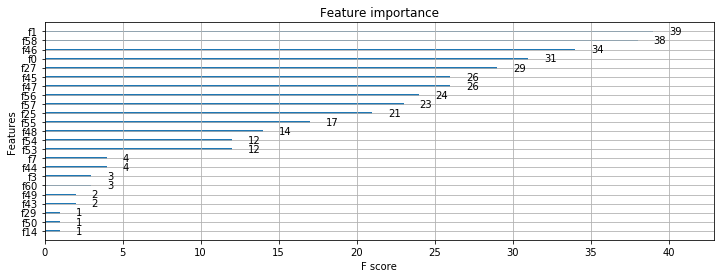

In [198]:
xgb.plot_importance(xgb1)

In [201]:
#Predict training set:
dtrain_predictions = xgb1.predict(train_X_train)
dtrain_predprob = xgb1.predict_proba(train_X_train)
#Print model report:
print("\nModel Report")
print("Accuracy : %.4g" % metrics.accuracy_score(train_Y_train, dtrain_predictions))
print("AUC Score (Train): %f" % metrics.roc_auc_score(train_X_train, dtrain_predprob))


Model Report
Accuracy : 0.3132
AUC Score (Train): 0.495268


## 성능을 좀 더 올리기 위해 Learning rate을 낮추고 n_estimator를 통해 tree를 더 추가한다 

In [202]:
xgb2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=10000,
 max_depth=2,
 min_child_weight=8,
 gamma=0.01,
 subsample=0.09,
 colsample_bytree=0.06,
 reg_alpha = 1e-05,
 objective= 'multi:softmax',
 nthread=4,
 scale_pos_weight=1,
 seed=27) 

In [203]:
xgb2.fit(train_X_train, train_Y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.06,
       gamma=0.01, learning_rate=0.01, max_delta_step=0, max_depth=2,
       min_child_weight=8, missing=None, n_estimators=10000, nthread=4,
       objective='multi:softprob', reg_alpha=1e-05, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.09)

## MSE 값을 측정한다. 

In [204]:
mean_squared_error(train_Y_val, xgb2.predict(train_X_val))

4.7555555555555555

## Feature Importance를 그래프로 그려 확인한다. 

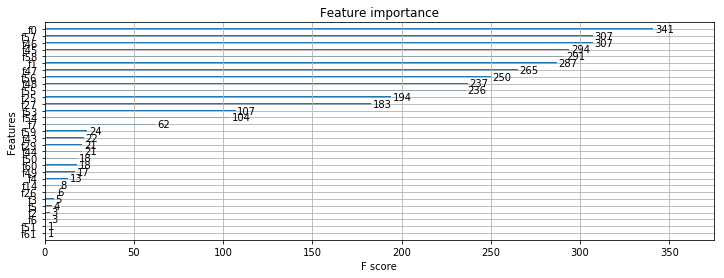

In [205]:
xgb.plot_importance(xgb2)

In [216]:
#Predict training set:
dtrain_predictions = xgb2.predict(train_X_val)
dtrain_predprob = xgb2.predict_proba(train_X_val)
#Print model report:
print("\nModel Report")
print("Accuracy : %.4g" % metrics.accuracy_score(train_Y_val, dtrain_predictions))
print("AUC Score (Train): %f" % metrics.roc_auc_score(train_X_val, dtrain_predprob))


Model Report
Accuracy : 0.3296
AUC Score (Train): 0.492288


In [218]:
print("Validation set의 예측: {}".format(xgb2.predict(train_X_val)[:10]))
print("실제 Validation set: {}".format(train_Y_val[:10]))
print("Validation Set의 정확도: {:.2f}".format(xgb2.score(train_X_val, train_Y_val)))
print("Test set의 예측: {}".format(xgb2.predict(test_X)[:10]))

Validation set의 예측: [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
실제 Validation set: [  0.   7.   7.   5.  10.  10.   5.   5.   7.   5.]
Validation Set의 정확도: 0.33
Test set의 예측: [ 4.  5.  5.  5.  5.  5.  5.  5.  5.  5.]


## Best Result에 대해 보여준다. 

In [263]:
best_xgb_result = xgb2
print(best_xgb_result)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.06,
       gamma=0.01, learning_rate=0.01, max_delta_step=0, max_depth=2,
       min_child_weight=8, missing=None, n_estimators=10000, nthread=4,
       objective='multi:softprob', reg_alpha=1e-05, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.09)


## Best Model의 MAE 값을 보여준다. 

In [357]:
best_xgb_model = best_xgb_result
best_xgb_model = best_xgb_model.fit(train_X_train, train_Y_train)
print(metrics.mean_absolute_error(best_xgb_model.predict(train_X_val), train_Y_val))

1.54814814815


In [266]:
# predict_proba 결과 중 앞부분 6개에 대해서만 확인한다.
print("예측 확률:\n{}".format(best_xgb_model.predict_proba(train_X_val)[:6]))

# 행 방향으로 확률을 더하면 모두 1이 된다.
print("합: {}".format(best_xgb_model.predict_proba(train_X_val)[:6].sum(axis=1)))

예측 확률:
[[ 0.04597149  0.04575544  0.04738645  0.13210092  0.13366631  0.23773444
   0.09812886  0.11085046  0.05152455  0.04585176  0.05102929]
 [ 0.04475919  0.04454884  0.04613684  0.12861733  0.13014142  0.25783595
   0.09554113  0.10792726  0.05016581  0.04464261  0.04968361]
 [ 0.04911323  0.04888242  0.05062489  0.14112884  0.14280121  0.18564042
   0.1048351   0.11842611  0.0550458   0.04898531  0.05451669]
 [ 0.04324971  0.04304646  0.0445809   0.12427977  0.12545304  0.2831645
   0.09231906  0.10428747  0.04847399  0.04313706  0.04800806]
 [ 0.04243613  0.0422367   0.04374228  0.12194193  0.12338693  0.29635522
   0.09058244  0.1023257   0.04756214  0.0423256   0.04710497]
 [ 0.04450689  0.04429772  0.04587676  0.12789232  0.12940782  0.26201952
   0.09500258  0.10731888  0.04988303  0.04439097  0.04940355]]
합: [ 1.  1.  1.  1.  1.  1.]


## predict_proba의 결과에 argmax 함수를 적용해서 예측을 재연할 수 있다. 

In [267]:
print("가장 큰 예측 확률의 인덱스:\n{}".format(np.argmax(best_xgb_model.predict_proba(train_X_val), axis=1)))
print("예측:\n{}".format(best_xgb_model.predict(train_X_val)))

가장 큰 예측 확률의 인덱스:
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 4 5 5 4 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 4 5 5 5 5 5 5 5 5 5]
예측:
[ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  4.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  4.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5. 

In [269]:
print("훈련 데이터에 있는 클래스 종류: {}".format(best_xgb_model.classes_))
print("Validation set의 예측: {}".format(best_xgb_model.predict(train_X_val)[:10]))
print("실제 Validation set: {}".format(train_Y_val[:10]))
print("Validation Set의 정확도: {:.2f}".format(best_xgb_model.score(train_X_val, train_Y_val)))
print("Test set의 예측: {}".format(best_xgb_model.predict(test_X)[:10]))

훈련 데이터에 있는 클래스 종류: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
Validation set의 예측: [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
실제 Validation set: [  0.   7.   7.   5.  10.  10.   5.   5.   7.   5.]
Validation Set의 정확도: 0.33
Test set의 예측: [ 4.  5.  5.  5.  5.  5.  5.  5.  5.  5.]


In [454]:
print("Test set의 전체 예측: {}".format(best_xgb_model.predict(test_X)))

Test set의 예측: [ 4.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  4.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  4.  5.  5.  5.  5.  5.  4.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  4.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]


## 2.8 SoftMax

Manual for `Soft Max`: [click](http://ufldl.stanford.edu/tutorial/supervised/SoftmaxRegression/)


SoftMax 모델을 통해 X와 Y variable들을 One Hot Encoding 해주고 최적 Accuracy를 찾아낸다. 


In [270]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

In [271]:
# Predicting animal type based on various features
xy = np.loadtxt('new_data.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [272]:
print(x_data.shape, y_data.shape)

(899, 15) (899, 1)


## Y 값의 클래스가 11개이므로 nb_classes를 11개로 잡는다.

In [273]:
nb_classes = 11  # 0 ~ 10

In [274]:
X = tf.placeholder(tf.float32, [None, 15])
Y = tf.placeholder(tf.int32, [None, 1])  # 0 ~ 10

In [275]:
Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot
print("one_hot", Y_one_hot)


one_hot Tensor("one_hot:0", shape=(?, 1, 11), dtype=float32)


In [276]:
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
print("reshape", Y_one_hot)

reshape Tensor("Reshape:0", shape=(?, 11), dtype=float32)


In [277]:
W = tf.Variable(tf.random_normal([15, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

In [278]:
# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

In [279]:
# Cross entropy cost/loss
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                 labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [304]:
# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    result8=[]
    for step in range(50000):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={
                                 X: x_data, Y: y_data})
            result8.append([hypothesis, step, loss, acc])
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))

    # Let's see if we can predict
    pred = sess.run(prediction, feed_dict={X: x_data})
    # y_data: (N,1) = flatten => (N, ) matches pred.shape
    for p, y in zip(pred, y_data.flatten()):
        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))

Step:     0	Loss: 12.367	Acc: 8.34%
Step:   100	Loss: 2.730	Acc: 23.58%
Step:   200	Loss: 2.395	Acc: 23.69%
Step:   300	Loss: 2.233	Acc: 27.03%
Step:   400	Loss: 2.133	Acc: 29.48%
Step:   500	Loss: 2.063	Acc: 30.70%
Step:   600	Loss: 2.014	Acc: 30.81%
Step:   700	Loss: 1.977	Acc: 31.92%
Step:   800	Loss: 1.948	Acc: 32.70%
Step:   900	Loss: 1.926	Acc: 32.93%
Step:  1000	Loss: 1.909	Acc: 34.15%
Step:  1100	Loss: 1.895	Acc: 34.48%
Step:  1200	Loss: 1.884	Acc: 34.93%
Step:  1300	Loss: 1.875	Acc: 35.04%
Step:  1400	Loss: 1.868	Acc: 35.26%
Step:  1500	Loss: 1.862	Acc: 35.48%
Step:  1600	Loss: 1.857	Acc: 35.71%
Step:  1700	Loss: 1.852	Acc: 35.82%
Step:  1800	Loss: 1.848	Acc: 35.71%
Step:  1900	Loss: 1.845	Acc: 35.71%
Step:  2000	Loss: 1.842	Acc: 35.60%
Step:  2100	Loss: 1.840	Acc: 35.93%
Step:  2200	Loss: 1.837	Acc: 36.04%
Step:  2300	Loss: 1.835	Acc: 36.26%
Step:  2400	Loss: 1.834	Acc: 36.15%
Step:  2500	Loss: 1.832	Acc: 36.26%
Step:  2600	Loss: 1.830	Acc: 36.48%
Step:  2700	Loss: 1.829	Acc:

Step: 22800	Loss: 1.804	Acc: 36.93%
Step: 22900	Loss: 1.804	Acc: 36.93%
Step: 23000	Loss: 1.804	Acc: 36.93%
Step: 23100	Loss: 1.804	Acc: 36.93%
Step: 23200	Loss: 1.804	Acc: 36.93%
Step: 23300	Loss: 1.804	Acc: 36.93%
Step: 23400	Loss: 1.804	Acc: 36.93%
Step: 23500	Loss: 1.804	Acc: 36.93%
Step: 23600	Loss: 1.804	Acc: 36.93%
Step: 23700	Loss: 1.804	Acc: 36.93%
Step: 23800	Loss: 1.804	Acc: 36.93%
Step: 23900	Loss: 1.804	Acc: 36.93%
Step: 24000	Loss: 1.804	Acc: 36.93%
Step: 24100	Loss: 1.804	Acc: 36.93%
Step: 24200	Loss: 1.804	Acc: 36.93%
Step: 24300	Loss: 1.804	Acc: 36.93%
Step: 24400	Loss: 1.804	Acc: 36.93%
Step: 24500	Loss: 1.804	Acc: 36.93%
Step: 24600	Loss: 1.804	Acc: 36.93%
Step: 24700	Loss: 1.804	Acc: 36.93%
Step: 24800	Loss: 1.804	Acc: 36.93%
Step: 24900	Loss: 1.804	Acc: 36.93%
Step: 25000	Loss: 1.804	Acc: 36.93%
Step: 25100	Loss: 1.804	Acc: 36.93%
Step: 25200	Loss: 1.804	Acc: 36.93%
Step: 25300	Loss: 1.804	Acc: 36.93%
Step: 25400	Loss: 1.804	Acc: 36.82%
Step: 25500	Loss: 1.804	Acc:

Step: 45600	Loss: 1.803	Acc: 36.71%
Step: 45700	Loss: 1.803	Acc: 36.71%
Step: 45800	Loss: 1.803	Acc: 36.71%
Step: 45900	Loss: 1.803	Acc: 36.71%
Step: 46000	Loss: 1.803	Acc: 36.71%
Step: 46100	Loss: 1.803	Acc: 36.71%
Step: 46200	Loss: 1.803	Acc: 36.71%
Step: 46300	Loss: 1.803	Acc: 36.71%
Step: 46400	Loss: 1.803	Acc: 36.71%
Step: 46500	Loss: 1.803	Acc: 36.71%
Step: 46600	Loss: 1.803	Acc: 36.71%
Step: 46700	Loss: 1.803	Acc: 36.71%
Step: 46800	Loss: 1.803	Acc: 36.71%
Step: 46900	Loss: 1.803	Acc: 36.71%
Step: 47000	Loss: 1.803	Acc: 36.71%
Step: 47100	Loss: 1.803	Acc: 36.71%
Step: 47200	Loss: 1.803	Acc: 36.71%
Step: 47300	Loss: 1.803	Acc: 36.71%
Step: 47400	Loss: 1.803	Acc: 36.71%
Step: 47500	Loss: 1.803	Acc: 36.71%
Step: 47600	Loss: 1.803	Acc: 36.71%
Step: 47700	Loss: 1.803	Acc: 36.71%
Step: 47800	Loss: 1.803	Acc: 36.71%
Step: 47900	Loss: 1.803	Acc: 36.71%
Step: 48000	Loss: 1.803	Acc: 36.71%
Step: 48100	Loss: 1.803	Acc: 36.71%
Step: 48200	Loss: 1.803	Acc: 36.71%
Step: 48300	Loss: 1.803	Acc:

In [305]:
sm_result = sorted(result8, key=lambda x: x[3], reverse=True)

In [306]:
sm_result

[[<tf.Tensor 'Softmax:0' shape=(?, 11) dtype=float32>,
  15900,
  1.8051865,
  0.37041157],
 [<tf.Tensor 'Softmax:0' shape=(?, 11) dtype=float32>,
  16000,
  1.8051617,
  0.37041157],
 [<tf.Tensor 'Softmax:0' shape=(?, 11) dtype=float32>,
  16100,
  1.805137,
  0.37041157],
 [<tf.Tensor 'Softmax:0' shape=(?, 11) dtype=float32>,
  16200,
  1.8051133,
  0.37041157],
 [<tf.Tensor 'Softmax:0' shape=(?, 11) dtype=float32>,
  16300,
  1.8050896,
  0.37041157],
 [<tf.Tensor 'Softmax:0' shape=(?, 11) dtype=float32>,
  16800,
  1.8049773,
  0.37041157],
 [<tf.Tensor 'Softmax:0' shape=(?, 11) dtype=float32>,
  16900,
  1.8049555,
  0.37041157],
 [<tf.Tensor 'Softmax:0' shape=(?, 11) dtype=float32>,
  17000,
  1.8049343,
  0.37041157],
 [<tf.Tensor 'Softmax:0' shape=(?, 11) dtype=float32>,
  17100,
  1.804913,
  0.37041157],
 [<tf.Tensor 'Softmax:0' shape=(?, 11) dtype=float32>,
  17200,
  1.8048927,
  0.37041157],
 [<tf.Tensor 'Softmax:0' shape=(?, 11) dtype=float32>,
  17300,
  1.8048718,
  0.3

## Best Result에 대해 보여준다. 

In [315]:
best_sm_result = sm_result[:1]
print(best_sm_result)

[[<tf.Tensor 'Softmax:0' shape=(?, 11) dtype=float32>, 15900, 1.8051865, 0.37041157]]


In [325]:
test_X.shape

(155, 63)

## Test set의 예측한 Y 값을 보여준다. 

In [343]:
test_X = np.loadtxt('test_X.csv', delimiter=',', dtype=np.float32)
# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # Let's see if we can predict
    pred = sess.run(prediction, feed_dict={X: test_X})
    # y_data: (N,1) = flatten => (N, ) matches pred.shape
    for p in pred:
        print("Prediction: {} ".format(p))

Prediction: 3 
Prediction: 3 
Prediction: 4 
Prediction: 4 
Prediction: 4 
Prediction: 4 
Prediction: 3 
Prediction: 4 
Prediction: 4 
Prediction: 3 
Prediction: 4 
Prediction: 4 
Prediction: 3 
Prediction: 3 
Prediction: 4 
Prediction: 4 
Prediction: 3 
Prediction: 4 
Prediction: 3 
Prediction: 3 
Prediction: 4 
Prediction: 3 
Prediction: 4 
Prediction: 3 
Prediction: 3 
Prediction: 3 
Prediction: 4 
Prediction: 1 
Prediction: 1 
Prediction: 3 
Prediction: 4 
Prediction: 1 
Prediction: 1 
Prediction: 3 
Prediction: 3 
Prediction: 1 
Prediction: 1 
Prediction: 1 
Prediction: 1 
Prediction: 1 
Prediction: 1 
Prediction: 1 
Prediction: 1 
Prediction: 1 
Prediction: 1 
Prediction: 1 
Prediction: 1 
Prediction: 4 
Prediction: 4 
Prediction: 4 
Prediction: 4 
Prediction: 1 
Prediction: 4 
Prediction: 4 
Prediction: 1 
Prediction: 4 
Prediction: 1 
Prediction: 4 
Prediction: 1 
Prediction: 1 
Prediction: 1 
Prediction: 4 
Prediction: 1 
Prediction: 1 
Prediction: 1 
Prediction: 1 
Prediction

## 2.9 Keras + Relu + SoftMax

Description for `Keras + Relu + SoftMax`: 
[click](https://keras.io/)
[click](https://github.com/Kulbear/deep-learning-nano-foundation/wiki/ReLU-and-Softmax-Activation-Functions)
[click](https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/)

Keras를 통해 고속 구현을 하고  Relu Activation Function을 통해 hidden layer에서 값을 찾아내 RNN을 구현한 후 SoftMax로 결과값을 처리해준 것이다. 

In [344]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [345]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
1
2
3
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [346]:
# load dataset
dataframe = pandas.read_csv("new_data.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:15].astype(float)
Y = dataset[:,15]
dataframe2 = pandas.read_csv("test_X.csv", header = None)
dataset2 = dataframe2.values
test_x = dataset2[:,0:15]

In [347]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [348]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=15, activation='relu'))
    model.add(Dense(11, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [349]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=5, verbose=0)

In [350]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [351]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 31.60% (4.97%)


In [352]:
# create model
model = Sequential()
model.add(Dense(100, input_dim=15, activation='relu'))
model.add(Dense(11, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [353]:
history = model.fit(X,dummy_y,epochs = 1000)

Epoch 1/1000
899/899 [==============================] - 0s - loss: 2.3226 - acc: 0.2581     
Epoch 2/1000
899/899 [==============================] - 0s - loss: 2.0894 - acc: 0.3103     
Epoch 3/1000
899/899 [==============================] - 0s - loss: 2.0464 - acc: 0.3148     
Epoch 4/1000
899/899 [==============================] - 0s - loss: 2.0059 - acc: 0.3159     
Epoch 5/1000
899/899 [==============================] - 0s - loss: 1.9787 - acc: 0.3270     
Epoch 6/1000
899/899 [==============================] - 0s - loss: 1.9583 - acc: 0.3370     
Epoch 7/1000
899/899 [==============================] - 0s - loss: 1.9408 - acc: 0.3248     
Epoch 8/1000
899/899 [==============================] - 0s - loss: 1.9209 - acc: 0.3370     
Epoch 9/1000
899/899 [==============================] - 0s - loss: 1.8985 - acc: 0.3404     
Epoch 10/1000
899/899 [==============================] - 0s - loss: 1.8864 - acc: 0.3426     
Epoch 11/1000
899/899 [==============================] - 0s - loss: 1

899/899 [==============================] - 0s - loss: 1.4298 - acc: 0.4961     
Epoch 175/1000
899/899 [==============================] - 0s - loss: 1.4263 - acc: 0.5072     
Epoch 176/1000
899/899 [==============================] - 0s - loss: 1.4291 - acc: 0.5028     
Epoch 177/1000
899/899 [==============================] - 0s - loss: 1.4300 - acc: 0.4950     
Epoch 178/1000
899/899 [==============================] - 0s - loss: 1.4251 - acc: 0.4939     
Epoch 179/1000
899/899 [==============================] - 0s - loss: 1.4297 - acc: 0.4950     
Epoch 180/1000
899/899 [==============================] - 0s - loss: 1.4213 - acc: 0.4894     
Epoch 181/1000
899/899 [==============================] - 0s - loss: 1.4384 - acc: 0.4805     
Epoch 182/1000
899/899 [==============================] - 0s - loss: 1.4225 - acc: 0.4905     
Epoch 183/1000
899/899 [==============================] - 0s - loss: 1.4185 - acc: 0.4928     
Epoch 184/1000
899/899 [==============================] - 0s - lo

899/899 [==============================] - 0s - loss: 1.2961 - acc: 0.5528     
Epoch 261/1000
899/899 [==============================] - 0s - loss: 1.2950 - acc: 0.5428     
Epoch 262/1000
899/899 [==============================] - 0s - loss: 1.2926 - acc: 0.5462     
Epoch 263/1000
899/899 [==============================] - 0s - loss: 1.2945 - acc: 0.5373     
Epoch 264/1000
899/899 [==============================] - 0s - loss: 1.2912 - acc: 0.5439     
Epoch 265/1000
899/899 [==============================] - 0s - loss: 1.2982 - acc: 0.5362     
Epoch 266/1000
899/899 [==============================] - 0s - loss: 1.2861 - acc: 0.5473     
Epoch 267/1000
899/899 [==============================] - 0s - loss: 1.2861 - acc: 0.5451     
Epoch 268/1000
899/899 [==============================] - 0s - loss: 1.2854 - acc: 0.5395     
Epoch 269/1000
899/899 [==============================] - 0s - loss: 1.2801 - acc: 0.5573     
Epoch 270/1000
899/899 [==============================] - 0s - lo

899/899 [==============================] - 0s - loss: 1.0897 - acc: 0.6174     
Epoch 433/1000
899/899 [==============================] - 0s - loss: 1.1135 - acc: 0.6029     
Epoch 434/1000
899/899 [==============================] - 0s - loss: 1.1004 - acc: 0.6162     
Epoch 435/1000
899/899 [==============================] - 0s - loss: 1.0951 - acc: 0.6073     
Epoch 436/1000
899/899 [==============================] - 0s - loss: 1.0909 - acc: 0.6251     
Epoch 437/1000
899/899 [==============================] - 0s - loss: 1.0986 - acc: 0.6162     
Epoch 438/1000
899/899 [==============================] - 0s - loss: 1.1015 - acc: 0.6096     
Epoch 439/1000
899/899 [==============================] - 0s - loss: 1.0878 - acc: 0.6251     
Epoch 440/1000
899/899 [==============================] - 0s - loss: 1.0838 - acc: 0.6229     
Epoch 441/1000
899/899 [==============================] - 0s - loss: 1.0795 - acc: 0.6229     
Epoch 442/1000
899/899 [==============================] - 0s - lo

899/899 [==============================] - 0s - loss: 1.0101 - acc: 0.6507     
Epoch 519/1000
899/899 [==============================] - 0s - loss: 1.0032 - acc: 0.6407     
Epoch 520/1000
899/899 [==============================] - 0s - loss: 1.0223 - acc: 0.6418     
Epoch 521/1000
899/899 [==============================] - 0s - loss: 1.0157 - acc: 0.6418     
Epoch 522/1000
899/899 [==============================] - 0s - loss: 1.0091 - acc: 0.6385     
Epoch 523/1000
899/899 [==============================] - 0s - loss: 1.0217 - acc: 0.6440     
Epoch 524/1000
899/899 [==============================] - 0s - loss: 1.0123 - acc: 0.6374     
Epoch 525/1000
899/899 [==============================] - 0s - loss: 0.9953 - acc: 0.6440     
Epoch 526/1000
899/899 [==============================] - 0s - loss: 0.9993 - acc: 0.6496     
Epoch 527/1000
899/899 [==============================] - 0s - loss: 1.0067 - acc: 0.6352     
Epoch 528/1000
899/899 [==============================] - 0s - lo

899/899 [==============================] - 0s - loss: 0.9305 - acc: 0.6852     
Epoch 605/1000
899/899 [==============================] - 0s - loss: 0.9509 - acc: 0.6785     
Epoch 606/1000
899/899 [==============================] - 0s - loss: 0.9302 - acc: 0.6785     
Epoch 607/1000
899/899 [==============================] - 0s - loss: 0.9298 - acc: 0.6841     
Epoch 608/1000
899/899 [==============================] - 0s - loss: 0.9447 - acc: 0.6763     
Epoch 609/1000
899/899 [==============================] - 0s - loss: 0.9398 - acc: 0.6774     
Epoch 610/1000
899/899 [==============================] - 0s - loss: 0.9441 - acc: 0.6897     
Epoch 611/1000
899/899 [==============================] - 0s - loss: 0.9299 - acc: 0.6863     
Epoch 612/1000
899/899 [==============================] - 0s - loss: 0.9247 - acc: 0.6830     
Epoch 613/1000
899/899 [==============================] - 0s - loss: 0.9389 - acc: 0.6808     
Epoch 614/1000
899/899 [==============================] - 0s - lo

899/899 [==============================] - 0s - loss: 0.8197 - acc: 0.7197     
Epoch 777/1000
899/899 [==============================] - 0s - loss: 0.8032 - acc: 0.7430     
Epoch 778/1000
899/899 [==============================] - 0s - loss: 0.8017 - acc: 0.7397     
Epoch 779/1000
899/899 [==============================] - 0s - loss: 0.7963 - acc: 0.7519     
Epoch 780/1000
899/899 [==============================] - 0s - loss: 0.8057 - acc: 0.7375     
Epoch 781/1000
899/899 [==============================] - 0s - loss: 0.7959 - acc: 0.7408     
Epoch 782/1000
899/899 [==============================] - 0s - loss: 0.8010 - acc: 0.7486     
Epoch 783/1000
899/899 [==============================] - 0s - loss: 0.7967 - acc: 0.7375     
Epoch 784/1000
899/899 [==============================] - 0s - loss: 0.8066 - acc: 0.7364     
Epoch 785/1000
899/899 [==============================] - 0s - loss: 0.7931 - acc: 0.7486     
Epoch 786/1000
899/899 [==============================] - 0s - lo

899/899 [==============================] - 0s - loss: 0.6852 - acc: 0.7864     
Epoch 949/1000
899/899 [==============================] - 0s - loss: 0.6849 - acc: 0.7875     
Epoch 950/1000
899/899 [==============================] - 0s - loss: 0.6899 - acc: 0.7864     
Epoch 951/1000
899/899 [==============================] - 0s - loss: 0.6995 - acc: 0.7831     
Epoch 952/1000
899/899 [==============================] - 0s - loss: 0.6825 - acc: 0.7898     
Epoch 953/1000
899/899 [==============================] - 0s - loss: 0.6875 - acc: 0.7753     
Epoch 954/1000
899/899 [==============================] - 0s - loss: 0.7083 - acc: 0.7709     
Epoch 955/1000
899/899 [==============================] - 0s - loss: 0.7018 - acc: 0.7686     
Epoch 956/1000
899/899 [==============================] - 0s - loss: 0.6905 - acc: 0.7786     
Epoch 957/1000
899/899 [==============================] - 0s - loss: 0.7004 - acc: 0.7853     
Epoch 958/1000
899/899 [==============================] - 0s - lo

## Train Data를 토대로 구한 Prediction 예측 값이다. 

In [358]:
model.predict_classes(X)

 32/899 [>.............................] - ETA: 0s

array([ 5,  7, 10,  3,  6,  5,  5,  6,  5,  9,  3,  3,  5,  1,  7,  4,  3,
        4,  9,  5,  5,  3,  8,  6,  3,  7,  9,  5,  3,  4,  4,  5,  5,  5,
       10,  5,  0,  2,  5,  5,  6,  0,  2,  7,  2,  2,  5,  4,  6,  2,  4,
        6,  5,  5,  9,  1,  8,  7,  4,  3,  3,  4,  5,  8,  5,  5,  5,  6,
        3,  3,  7,  5,  7,  3,  5,  0,  5,  5,  6,  2,  8,  5,  3,  6,  3,
        5,  4,  0,  5,  5,  6,  8,  5,  3,  6,  5,  6,  0,  4,  7,  6,  6,
        5,  6,  4,  5,  3,  5,  9,  1,  6,  4,  4,  3,  7,  7, 10,  5,  5,
        7,  6,  7,  0,  4,  3, 10,  3,  1,  7,  4,  6,  6,  6,  4,  5,  5,
        5,  5,  7,  1,  5,  3,  4,  6,  5,  4,  5,  3,  7,  6,  5,  5,  5,
        7,  4,  8, 10, 10,  3,  7,  5,  6, 10,  5,  3,  8,  8,  3,  5,  6,
        5,  8,  7,  7,  6,  4,  5,  5,  0,  5,  5,  6,  5,  6,  5,  2,  0,
        2,  6,  3,  5,  2,  6,  5,  3,  2,  6,  5,  5, 10,  5,  1,  7,  5,
        6,  8,  5,  7,  3,  3,  3,  7,  4,  5,  6,  0,  1,  6,  4,  5,  5,
        6,  6,  5,  3,  6

In [361]:
model.predict_proba(X)

 32/899 [>.............................] - ETA: 0s

array([[  1.02007186e-06,   1.77738280e-03,   1.46753073e-03, ...,
          2.99268775e-03,   1.65467995e-09,   5.11392672e-03],
       [  4.52406748e-05,   1.39105810e-10,   9.22930710e-09, ...,
          2.89429468e-03,   3.42403859e-04,   1.97233952e-04],
       [  8.11468344e-04,   3.59599881e-07,   5.29041653e-03, ...,
          2.22583640e-06,   1.34378002e-04,   6.09360099e-01],
       ..., 
       [  7.29348892e-09,   3.60597647e-03,   8.33716869e-01, ...,
          1.46212697e-03,   7.49616248e-19,   1.30419963e-07],
       [  1.22919760e-03,   3.06906038e-08,   3.35362131e-07, ...,
          2.18422394e-02,   2.39874911e-03,   1.79638300e-05],
       [  1.64378226e-01,   2.66652738e-17,   1.02656266e-13, ...,
          2.37487452e-08,   7.84304664e-02,   2.83786212e-04]], dtype=float32)

## Test set의 예측값이다.


In [360]:
y_pred = model.predict_classes(test_x)

 32/155 [=====>........................] - ETA: 0s

In [355]:
y_pred

array([10,  5,  1,  8,  5,  7,  7,  5,  5,  6,  5,  6,  6,  9,  5,  6, 10,
        6,  7,  6,  1,  7,  7,  7,  7,  1,  3,  5,  5,  6,  5, 10,  4,  5,
        5,  7,  6,  5,  3,  3,  5,  6,  5,  5,  5,  3,  7,  7,  6, 10,  8,
       10,  7,  3,  7,  5,  5,  4,  8,  5,  8,  5,  5,  6,  3,  5,  6,  2,
        5,  5,  5, 10,  5,  5,  5,  5,  5,  5,  4,  3,  5,  3,  4,  5,  6,
        5,  5,  2,  3,  6,  5,  6,  5,  5,  5,  4,  5,  5,  5,  6,  0,  7,
        7,  7,  0,  3,  5,  5,  3,  7,  5,  3,  3,  4,  0,  5,  5,  5,  4,
        5,  4,  0,  5,  4,  4,  5,  6,  5,  5,  7,  4,  5,  4,  6,  6,  6,
        3,  5,  5,  7,  3,  9,  5,  3,  5,  5,  5,  5,  6,  5,  5,  5,  0,
        0,  4], dtype=int64)

# 3. Conclusion

## - Data 전처리 과정

### Data set의 모든 변수가 categorical number이기 때문에 One Hot Encoding을 통해 numerical 의미를 같는 dummy 변수로 바꿔주어야 했다. 
### K2 ~ K14까지의 질문들에 Missing Value들은 MICE 모델을 통해 Imputation 해주었다. SoftImpute과 KNN 방법을 써 동일한 모델을 돌려보았으나 성능 차이가 크게 나지 않아 MICE Imputation을 썼다. 
### Ideo_self column의 Missing Value 유무에 따라 Train set과 Test set으로 나눠주었다.  

## - Data Modeling 과정

### Train set을 토대로 위의 9개의 모델들의 성능을 평가해 최적 모델의 정확도와 AUC 값은 다음과 같다. 

### ***`Parameter 조정으로 찾은 최적 Logistic Classifier의 결과값`***
    - MAE: 2.607
    - 훈련 데이터에 있는 클래스 종류: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
    - 가장 큰 결정 함수의 인덱스: [ 0  1 10  8  0  6  9  1  2  3]
    - 인덱스를 classses_에 연결: [  0.   1.  10.   8.   0.   6.   9.   1.   2.   3.]
    - Validation set의 예측(상위 10개): [  5.   5.   5.   3.  10.  10.   4.   5.  10.   5.]
    - 실제 Validation set(상위 10개): [  0.   7.   7.   5.  10.  10.   5.   5.   7.   5.]
    - Validation Set의 정확도: 0.14
    - Test set의 예측(상위 10개): [  8.  10.   1.   8.   7.  10.   8.   0.   1.   9.]

### ***`Parameter 조정으로 찾은 최적 KNN의 결과값`***
    - MAE:1.445
    - 훈련 데이터에 있는 클래스 종류: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
    - Validation set의 예측(상위 10개): [  5.   5.   5.   3.  10.  10.   4.   5.  10.   5.]
    - 실제 Validation set(상위 10개): [  0.   7.   7.   5.  10.  10.   5.   5.   7.   5.]
    - Validation Set의 정확도: 0.30
    - Test set의 예측(상위 10개): [ 8.  8.  5.  8.  5.  8.  6.  5.  5.  9.]

### ***`Parameter 조정으로 찾은 최적 Naive Bayes classifier의 결과값`***
    - MAE: 3.633
    - 훈련 데이터에 있는 클래스 종류: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
    - Validation set의 예측(상위 10개): [  4.   1.  10.   7.  10.   9.   0.   1.  10.   1.]
    - 실제 Validation set(상위 10개): [  0.   7.   7.   5.  10.  10.   5.   5.   7.   5.]
    - Validation Set의 정확도: 0.04
    - Test set의 예측(상위 10개): [  9.  10.   1.   1.   9.   9.   9.   1.   1.   9.]

### ***`Parameter 조정으로 찾은 최적 Decision Tree의 결과값`***
    - MAE: 1.611
    - 훈련 데이터에 있는 클래스 종류: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
    - Validation set의 예측(상위 10개): [  4.   5.   5.   5.   5.   8.   5.   3.  10.   5.]
    - 실제 Validation set(상위 10개): [  0.   7.   7.   5.  10.  10.   5.   5.   7.   5.]
    - Validation Set의 정확도: 0.29
    - Test set의 예측(상위 10개): [  8.  10.   3.   8.   5.   8.   8.   3.   5.   8.]

### ***`Parameter 조정으로 찾은 최적 Random Forest의 결과값`***
    - MAE: 1.478
    - 훈련 데이터에 있는 클래스 종류: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
    - Validation set의 예측(상위 10개): [ 5.  5.  5.  5.  5.  8.  5.  5.  5.  5.]
    - 실제 Validation set(상위 10개): [  0.   7.   7.   5.  10.  10.   5.   5.   7.   5.]
    - Validation Set의 정확도: 0.35
    - Test set의 예측(상위 10개): [  8.  10.   1.   8.   7.  10.   8.   0.   1.   9.]

### ***`Parameter 조정으로 찾은 최적 SVM의 결과값`***
    - MAE: 1.415
    - 훈련 데이터에 있는 클래스 종류: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
    - 가장 큰 결정 함수의 인덱스: [31 40 38 43 50 52 43 43 41 43]
    - Validation set의 예측(상위 10개): [ 5.  5.  5.  5.  5.  8.  5.  5.  5.  5.]
    - 실제 Validation set(상위 10개): [  0.   7.   7.   5.  10.  10.   5.   5.   7.   5.]
    - Validation Set의 정확도: 0.34
    - Test set의 예측(상위 10개): [  8.  10.   1.   8.   7.  10.   8.   0.   1.   9.]

### ***`Parameter 조정으로 찾은 최적 Xgboost의 결과값`***
    - MAE: 1.548
    - 훈련 데이터에 있는 클래스 종류: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
    - Validation set의 예측(상위 10개): [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
    - 실제 Validation set(상위 10개): [  0.   7.   7.   5.  10.  10.   5.   5.   7.   5.]
    - Validation Set의 정확도: 0.33
    - Test set의 예측(상위 10개): [ 4.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
    
### ***`Parameter 조정으로 찾은 최적 SoftMax의 결과값`***
    - 훈련 데이터에 있는 클래스 종류: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
    - Validation set의 예측(상위 10개): [ 5.  7.  5.  6.  5.  3.  5.  5.  5.  9.]
    - 실제 Validation set(상위 10개): [  0.   7.   7.   5.  10.  10.   5.   5.   7.   5.]
    - Validation Set의 정확도: 0.37
    - Test set의 예측(상위 10개): [ 3.  3.  4.  4.  4.  4.  3.  4.  4.  3.]

### ***`Parameter 조정으로 찾은 최적 Keras + Relu + SoftMax의 결과값`***
    - 훈련 데이터에 있는 클래스 종류: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
    - Validation set의 예측(상위 10개): [ 5.  7. 10.  3.  6.  5.  5.  6.  5.  9.]
    - 실제 Validation set(상위 10개): [  0.   7.   7.   5.  10.  10.   5.   5.   7.   5.]
    - Validation Set의 정확도: 0.32
    - Test set의 예측(상위 10개): [ 10.  5.  1.  8.  5.  7.  7.  5.  5.  6.] 


## - Data Interpretation 

### 9개의 모델을 돌려본 결과 지도 학습 모델에서는 Random Forest, SVM, Xgboost가 가장 좋은 Validation set 정확도를 보여줬다. 비지도 학습 모델에서는 SoftMax 모델이 37%의 Validation set 정확도를 보여줌으로써 9개의 모델 중 가장 좋은 결과물을 보여줬다.  
### SoftMax 모델을 쓴 이유는 일단 모든 변수들이 Categorical value이기에 One Hot Encoding을 해 numerical type으로 바꿔줄 필요가 있었다. Softmax 모델의 입력받은 값은  0~1사이의 값으로 모두 정규화되며 출력 값들의 총합은 항상 1이 되는 특성을 가진다. 출력은 분류하고 싶은 클래수의 수 만큼 구성되며 가장 큰 출력 값을 부여받은 클래스가 확률이 가장 높은 것으로 이용했다. 그러나 성능이 생각보다 높게 나오지 않았기 때문에 보완의 필요성을 느꼈다. 
### SoftMax 모델을 보완하기 위해 Keras를 통해 고속 계산을 하고 Relu Activation Function을 사용해 hidden layer 값을 구해 SoftMax 모델에 적용시켜 보았다. 그러나 오히려 SoftMax 모델 하나만을 사용한 것보다 성능이 떨어지는 결과물을 보여줬다. 
### 각 모델의 Parameter들을 Grid Search를 통해 조절해가며 최적 모델을 찾아 예측을 해보았지만 데이터가 총 1000개 정도 밖에 되지 않기에 더 이상의 성능을 끌어올릴 수 없었다. Parameter들을 조금 더 세밀하게 수정한다면 약간의 상승 효과는 볼 수 있을 것으로 예상되나 그 차이가 미미할 것으로 보이기에 더 이상 시도하지 않았다. 더 많은 데이터 셋을 이용해 모델링을 해본다면 분명 더 높은 성능을 보일 것이라고 생각된다. 


## 결과 비교

### 실제 데이터와 예측 값을 비교하려면 위의 모델링마다 마지막에 test set에 의한 예측값을 뽑아놨다.


